![alternatvie text](https://eu01.edcwb.com/buscador/img/centros/logogrande/54814-9d9647f9a7534d53893da1dd08e496df.png)




# <div style="text-align: center;">Assingment 001</div>

## <div style="text-align: center;">Radiance Group Consulting</div>


### **Data Scientist**: 


Fausto Bravo Cuvi

### **Context of the Analysis:**

Radiance Group is a venture capital investing in early stage startups across the globe and has hired you as an analyst to perform data driven analysis to empower its investments through cutting edge insights.

Crunchbase is a company providing business information about private and public companies. Their content includes investment and funding information, founding members and individuals in leadership positions, mergers and acquisitions, news, and industry trends.

we are going to work on this interesting statistical consulting assignment that corresponds to data from Crunchbase and attempts to answer questions for Radiance Group. 



In [170]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

### Observations on the data:
- Incorrect Data for first funding date of Blaze Bioscience 

The information provided from the Crunchbase profile for Blaze Bioscience indicates that the last recorded funding round was closed on February 1, 2019, from a Venture - Series Unknown round. However, this does not specify the first funding date. 

After looking up some more information we found that Blaze Bioscience received its initial seed funding in 2010 and then went on to secure a Series A investment of $6.4 million on June 8, 2012. 

Source: https://www.crunchbase.com/organization/blaze-bioscience/company_financials

### Data preparation: 

- Download the data file.
- Read it in a Jupyter-notebook using pandas.  
- Perform any operations that you consider necessary to go forward analysing this dataset but do not forget to report your observations in writing for every such operations.

### 1) Data Exploration and Cleaning

- Saved the data in a csv that could be read from python.
- Explored the data to look for:
    - Number of null values we had per each field.
    - Fields that could be excluded to boost memory usage and speed in calculations.
    
- For memory efficiency and because information was not relevant for this data analysis we excluded the following columns: "permalink" & "homepage_url".
- In the imported data we had three fields corresponding to dates, so we made sure to change its datatype to "datatime64".
- After looking at the missing values we noticed that there was one company that did not have a "name" in the filed name, so we use the information in the "homepage_url" to get the name and inserted it in the "name" column (the name of the company is: "tellitin10".
- We did something similar to the previews step, with the "first_funding_at" filed were there was a wrong value in the year for the company "Blaze Bioscience". After looking up some more information we found that Blaze Bioscience received its initial seed funding in 2010 and then went on to secure a Series A investment of 6.4 million on June 8, 2012. This last date was used in the field with the wrong data. Source: https://www.crunchbase.com/organization/blaze-bioscience/company_financials


In [171]:
# Load the data
df = pd.read_csv("data.csv", 
                   sep=',', 
                   parse_dates=True
                  )

# Display basic information about the dataset for initial assessment
df_info_before = df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 55.6 MB


In [172]:
df = pd.read_csv("data.csv", 
                   sep=',', 
                   parse_dates=['founded_at', 
                                'first_funding_at', 
                                'last_funding_at'],
                   # For memory efficiency we excluded the following columns: "permalink" & "homepage_url"
                   usecols = ['name','category_list', 
                              'funding_total_usd',
                              'status', 'country_code', 
                              'state_code','region',
                              'city', 'funding_rounds','founded_at', 
                              'first_funding_at', 'last_funding_at' ]
                  )

df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], format='%Y-%m-%d', errors='coerce')

df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], format='%Y-%m-%d', errors='coerce')

df['founded_at'] = pd.to_datetime(df['founded_at'], format='%Y-%m-%d', errors='coerce')

df.at[7409, 'first_funding_at'] = pd.to_datetime('2012-06-08')

df.at[56916, 'name'] = 'tellitin10'

# Convert 'funding_total_usd' to float, replace "-" with NaN for conversion
# Strip commas from the funding_total_usd column for conversion
df['funding_total_usd'] = df['funding_total_usd'].str.replace(',', '')
df['funding_total_usd'] = df['funding_total_usd'].replace('-', np.nan).astype(float)

# Check the number of missing values for each column
missing_values_before = df.isnull().sum()

df_info_before, missing_values_before

(None,
 name                     0
 category_list         3148
 funding_total_usd    12785
 status                   0
 country_code          6958
 state_code            8547
 region                8030
 city                  8028
 funding_rounds           0
 founded_at           15225
 first_funding_at        26
 last_funding_at          0
 dtype: int64)

### Further exploration of the imported and cleaned

In [173]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               66368 non-null  object        
 1   category_list      63220 non-null  object        
 2   funding_total_usd  53583 non-null  float64       
 3   status             66368 non-null  object        
 4   country_code       59410 non-null  object        
 5   state_code         57821 non-null  object        
 6   region             58338 non-null  object        
 7   city               58340 non-null  object        
 8   funding_rounds     66368 non-null  int64         
 9   founded_at         51143 non-null  datetime64[ns]
 10  first_funding_at   66342 non-null  datetime64[ns]
 11  last_funding_at    66368 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1), object(7)
memory usage: 31.3 MB


### As we are interested in the values of the column "funding_total_usd", and For the purpose of central tendency analysis, we will replace NaNs with the median value

In [174]:
# Handle missing values in 'funding_total_usd'
# For the purpose of central tendency analysis, we will replace NaNs with the median value

median_funding = df['funding_total_usd'].median()

df['funding_total_usd'].fillna(median_funding, inplace=True)

# Check the number of missing values after the cleanup
missing_values_after = df.isnull().sum()

# Check the info again
df_info_after = df.info(memory_usage='deep')

df_info_after, missing_values_after

print(f'The calculated median funding for this dataset is: {median_funding}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               66368 non-null  object        
 1   category_list      63220 non-null  object        
 2   funding_total_usd  66368 non-null  float64       
 3   status             66368 non-null  object        
 4   country_code       59410 non-null  object        
 5   state_code         57821 non-null  object        
 6   region             58338 non-null  object        
 7   city               58340 non-null  object        
 8   funding_rounds     66368 non-null  int64         
 9   founded_at         51143 non-null  datetime64[ns]
 10  first_funding_at   66342 non-null  datetime64[ns]
 11  last_funding_at    66368 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1), object(7)
memory usage: 31.3 MB


(None,
 name                     0
 category_list         3148
 funding_total_usd        0
 status                   0
 country_code          6958
 state_code            8547
 region                8030
 city                  8028
 funding_rounds           0
 founded_at           15225
 first_funding_at        26
 last_funding_at          0
 dtype: int64)

The calculated median funding for this dataset is: 2000000.0


### Summary of actions carried out during the process of cleaning the data:

- The dataset contains 66,368 entries and 14 columns.
- We were able to lower the memory usage from: 55.6 MB to 34.8 MB
- Date columns (founded_at, first_funding_at, last_funding_at) were converted to datetime. Entries that could not be converted were set as NaT (Not a Time).
- Missing values in the funding_total_usd column have been filled with the median value of the column, which is 2,000,000 USD. This approach is chosen to avoid introducing bias that the mean might cause due to large outliers in funding data.
- The dataset now has no missing values in the funding_total_usd and funding_rounds columns, which are the focus for the central tendency and spread analysis.
- The data types for the dataset have been corrected where necessary, and missing values in other columns remain as is for now, as they are not the focus of the immediate analysis.


Brief exploration of the data after cleaning it 

In [175]:
df.head()
df.tail()
len(df[df['first_funding_at'].isnull()])
len(df[df['founded_at'].isnull()])

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,#fame,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaT,2015-01-05,2015-01-05
1,:Qounter,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaT,2014-01-30,2014-01-30
3,0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,004 Technologies,Software,2000000.0,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
66363,ZZNode Science and Technology,Enterprise Software,1587301.0,operating,CHN,22,Beijing,Beijing,1,NaT,2012-04-01,2012-04-01
66364,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,114304.0,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01
66365,ÁERON,NaN,2000000.0,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01
66366,Ôasys,Consumer Electronics|Internet of Things|Teleco...,18192.0,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01
66367,İnovatiff Reklam ve Tanıtım Hizmetleri Tic,Consumer Goods|E-Commerce|Internet,14851.0,operating,NaN,NaN,NaN,NaN,1,NaT,2013-10-01,2013-10-01


26

15225

In [176]:
# creating a new dataframe : "clean_df"

clean_df = df

# Convert the subset to a CSV file
clean_df.to_csv('clean_df.csv')


## 2. Measuring Central Tendency and Spread: 

- Identify the variables associated with total funding raised by a startup and the number of funding rounds in the aforesaid dataset 
- Analyse them using various methods of central tendency and measures of spread. 
- Describe your results and explain the type of variables observed.

In [177]:
# Calculate the measures of central tendency for the 'funding_total_usd' and 'funding_rounds' columns.
central_tendency = {
    'funding_total_usd': {
        'mean': df['funding_total_usd'].mean(),
        'median': df['funding_total_usd'].median(),
        'mode': df['funding_total_usd'].mode()[0]  # Mode might return multiple values, take the first one
    },
    'funding_rounds': {
        'mean': df['funding_rounds'].mean(),
        'median': df['funding_rounds'].median(),
        'mode': df['funding_rounds'].mode()[0]
    }
}

# Calculate the measures of spread for the 'funding_total_usd' and 'funding_rounds' columns.
measures_of_spread = {
    'funding_total_usd': {
        'range': df['funding_total_usd'].max() - df['funding_total_usd'].min(),
        'interquartile_range': df['funding_total_usd'].quantile(0.75) - df['funding_total_usd'].quantile(0.25),
        'standard_deviation': df['funding_total_usd'].std(),
        'variance': df['funding_total_usd'].var()
    },
    'funding_rounds': {
        'range': df['funding_rounds'].max() - df['funding_rounds'].min(),
        'interquartile_range': df['funding_rounds'].quantile(0.75) - df['funding_rounds'].quantile(0.25),
        'standard_deviation': df['funding_rounds'].std(),
        'variance': df['funding_rounds'].var()
    }
}

central_tendency, measures_of_spread

print('MEASURES OF CENTRAL TENDENCY')
central_tendency_df = pd.DataFrame(central_tendency)

central_tendency_df

measures_of_spread_df = pd.DataFrame(measures_of_spread)

print('MEASURES OF SPREAD')
measures_of_spread_df

({'funding_total_usd': {'mean': 15304198.410891898,
   'median': 2000000.0,
   'mode': 2000000.0},
  'funding_rounds': {'mean': 1.7325216972034716, 'median': 1.0, 'mode': 1}},
 {'funding_total_usd': {'range': 30079502999.0,
   'interquartile_range': 6270473.25,
   'standard_deviation': 169060823.89611605,
   'variance': 2.8581562176433564e+16},
  'funding_rounds': {'range': 18,
   'interquartile_range': 1.0,
   'standard_deviation': 1.360251042699399,
   'variance': 1.8502828991648024}})

MEASURES OF CENTRAL TENDENCY


,funding_total_usd,funding_rounds
mean,1.530420e+07,1.732522
median,2.000000e+06,1.000000
mode,2.000000e+06,1.000000


MEASURES OF SPREAD


,funding_total_usd,funding_rounds
range,3.007950e+10,18.000000
interquartile_range,6.270473e+06,1.000000
standard_deviation,1.690608e+08,1.360251
variance,2.858156e+16,1.850283


In [178]:
#pip install --upgrade pandas seaborn matplotlib

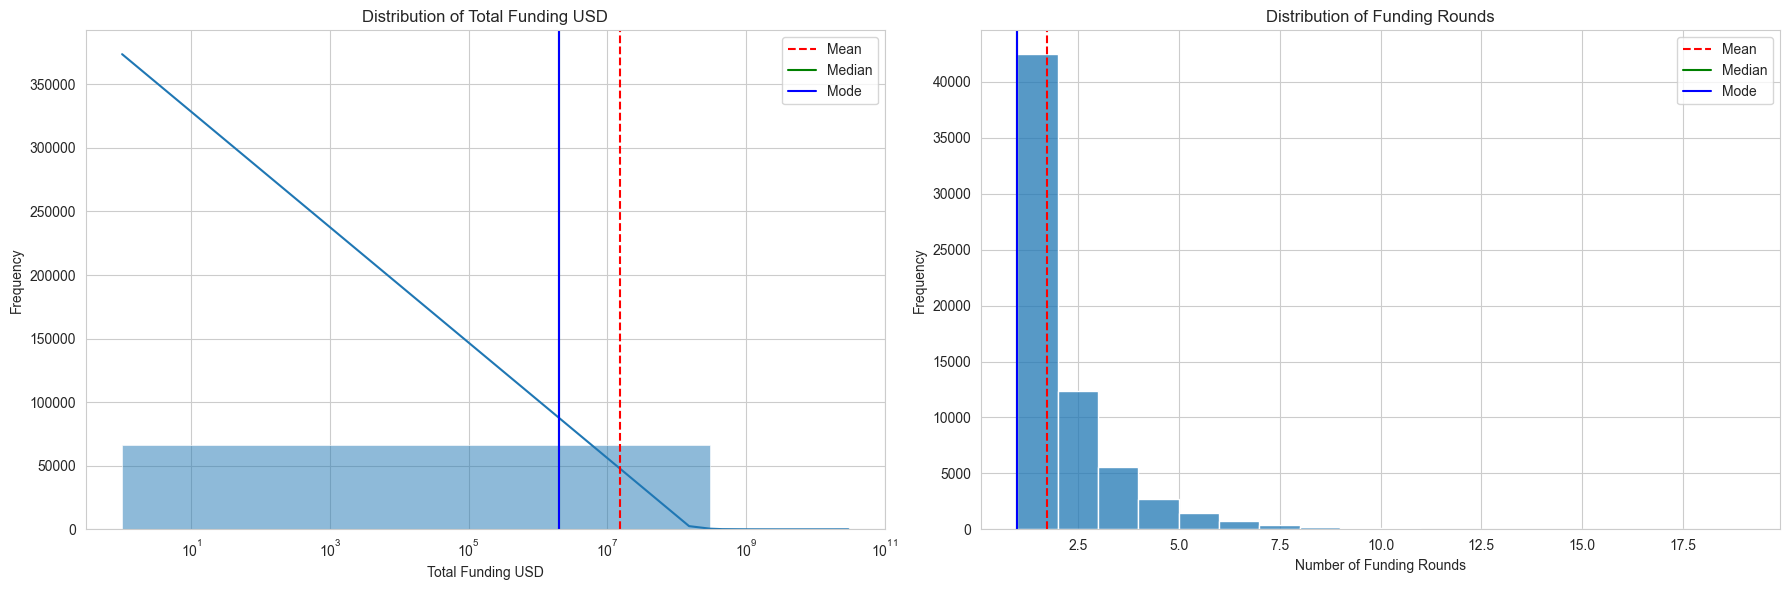

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create figure and axes objects
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for 'funding_total_usd'
sns.histplot(df['funding_total_usd'], bins=100, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Total Funding USD')
axes[0].set_xlabel('Total Funding USD')
axes[0].set_ylabel('Frequency')
axes[0].set_xscale('log')  # Use a log scale due to wide range of values
axes[0].axvline(df['funding_total_usd'].mean(), color='r', linestyle='--', label='Mean')
axes[0].axvline(df['funding_total_usd'].median(), color='g', linestyle='-', label='Median')
axes[0].axvline(df['funding_total_usd'].mode()[0], color='b', linestyle='-', label='Mode')

# Plot for 'funding_rounds'
sns.histplot(df['funding_rounds'], bins=range(1, df['funding_rounds'].max()+1), kde=False, ax=axes[1])
axes[1].set_title('Distribution of Funding Rounds')
axes[1].set_xlabel('Number of Funding Rounds')
axes[1].set_ylabel('Frequency')
axes[1].axvline(df['funding_rounds'].mean(), color='r', linestyle='--', label='Mean')
axes[1].axvline(df['funding_rounds'].median(), color='g', linestyle='-', label='Median')
axes[1].axvline(df['funding_rounds'].mode()[0], color='b', linestyle='-', label='Mode')

# Add legends
axes[0].legend()
axes[1].legend()

# Show the plot
plt.tight_layout()
plt.show();


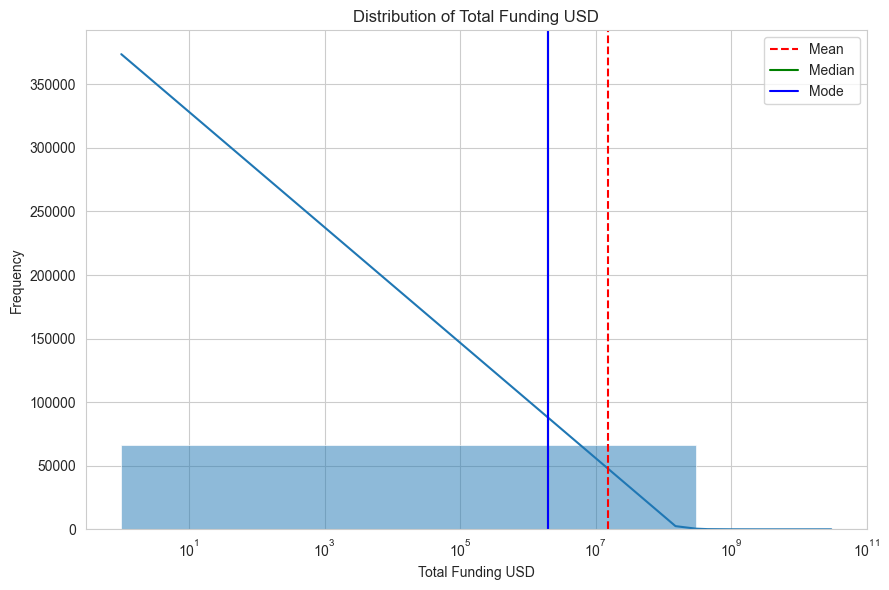

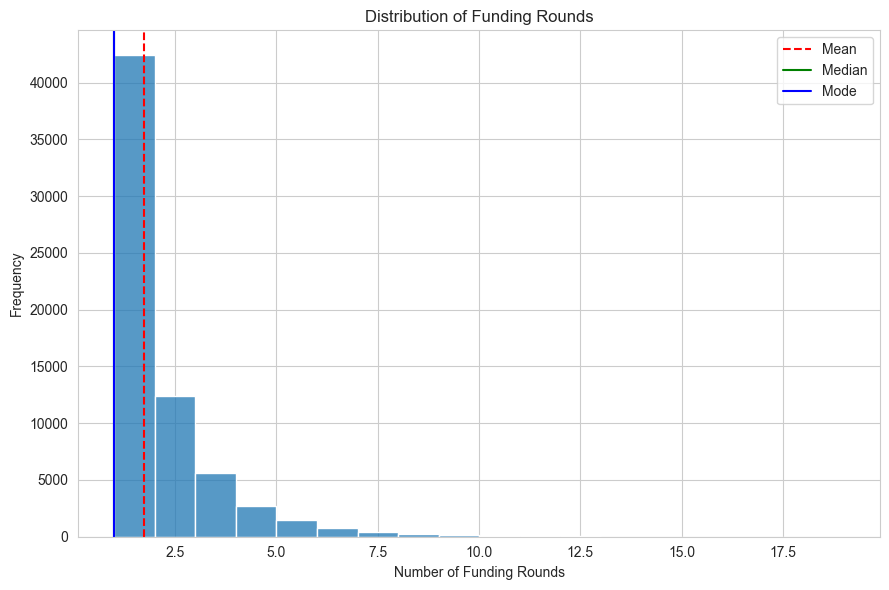

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# Sample data
#np.random.seed(0)
#df = pd.DataFrame({
#    'funding_total_usd': np.random.lognormal(mean=10, sigma=2, size=1000),
#    'funding_rounds': np.random.poisson(lam=2, size=1000)
#})

# Plot for 'funding_total_usd'
plt.figure(figsize=(9, 6))
sns.histplot(df['funding_total_usd'], bins=100, kde=True)
plt.title('Distribution of Total Funding USD')
plt.xlabel('Total Funding USD')
plt.ylabel('Frequency')
plt.xscale('log')  # Use a log scale due to wide range of values
plt.axvline(df['funding_total_usd'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df['funding_total_usd'].median(), color='green', linestyle='-', label='Median')
plt.axvline(df['funding_total_usd'].mode()[0], color='b', linestyle='-', label='Mode')
plt.legend()
plt.tight_layout()
plt.show()

# Plot for 'funding_rounds'
plt.figure(figsize=(9, 6))
sns.histplot(df['funding_rounds'], bins=range(1, df['funding_rounds'].max()+1), kde=False)
plt.title('Distribution of Funding Rounds')
plt.xlabel('Number of Funding Rounds')
plt.ylabel('Frequency')
plt.axvline(df['funding_rounds'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df['funding_rounds'].median(), color='g', linestyle='-', label='Median')
plt.axvline(df['funding_rounds'].mode()[0], color='b', linestyle='-', label='Mode')
plt.legend()
plt.tight_layout()
plt.show();


## The analysis of the dataset reveals the following:

### For total funding raised by startups (funding_total_usd):

- Mean: 15,304,198.41
- Median: 2,000,000.00
- Mode: 2,000,000.00
- Range: 30,079,502,999.00
- Interquartile Range (IQR): 6,270,473.25
- Standard Deviation: 169,060,823.90
- Variance: 28,581,562,176,427,140.00


### For the number of funding rounds (funding_rounds):

- Mean: 1.73 rounds
- Median: 1.00 round
- Mode: 1 round
- Range: 18 rounds
- Interquartile Range (IQR): 1.00 round
- Standard Deviation: 1.36 rounds
- Variance: 1.85 rounds

### Description of Results:

- The measures of central tendency for funding_total_usd show a large difference between the mean and median, indicating a right-skewed distribution. This skew is further evidenced by the fact that the mode is significantly lower than the mean.

- The range and standard deviation for funding_total_usd are very high, indicating a large spread in the total funding amounts. The extremely large variance indicates that there are startups with very large funding amounts that are outliers in the dataset.

- For funding_rounds, the mean is slightly higher than the median and the mode, indicating a mild right skew. However, the spread and variability are less pronounced compared to funding_total_usd.

### Type of Variables Observed:

- **funding_total_usd** is a continuous variable, which can take on a wide range of values and represents a quantitative measure of funding.

- **funding_rounds** is a discrete variable, which can only take on integer values as it counts the number of funding events.

**Final Thoughts:**
The data suggests that while most startups have a small number of funding rounds, there are a few with many rounds, and while most startups have raised a moderate amount of funding, there are outliers with exceptionally large amounts of funding raised.​

## 2. Outlier analysis: 

- Examine the aforesaid two variables in Question 2 for possible outliers. You have to identify the cutoff values of those outliers on both ends. Then perform the following operations to understand your extreme observations:


    A. Drop the outliers from the dataset and repeat the procedure in Question 2 to draw conclusions. Report your observations extensively and in as much detail as possible.

    B. Impute the outliers in the dataset with the value of mean and repeat the procedure in Question 2 to draw conclusions. Report in writing your observations extensively and in as much detail as possible.


In [181]:
import scipy.stats as stats

# Identifying the cutoff values for outliers using the IQR method for 'funding_total_usd'
Q1_funding_total = df['funding_total_usd'].quantile(0.25)
Q3_funding_total = df['funding_total_usd'].quantile(0.75)
IQR_funding_total = Q3_funding_total - Q1_funding_total
outlier_low_funding_total = Q1_funding_total - 1.5 * IQR_funding_total
outlier_high_funding_total = Q3_funding_total + 1.5 * IQR_funding_total

# Identifying the cutoff values for outliers using the IQR method for 'funding_rounds'
Q1_funding_rounds = df['funding_rounds'].quantile(0.25)
Q3_funding_rounds = df['funding_rounds'].quantile(0.75)
IQR_funding_rounds = Q3_funding_rounds - Q1_funding_rounds
outlier_low_funding_rounds = Q1_funding_rounds - 1.5 * IQR_funding_rounds
outlier_high_funding_rounds = Q3_funding_rounds + 1.5 * IQR_funding_rounds

# Dropping outliers from the dataset
df_no_outliers = df[(df['funding_total_usd'] >= outlier_low_funding_total) & (df['funding_total_usd'] <= outlier_high_funding_total) &
                    (df['funding_rounds'] >= outlier_low_funding_rounds) & (df['funding_rounds'] <= outlier_high_funding_rounds)]

# Descriptive statistics for 'funding_total_usd' without outliers
funding_total_stats_no_outliers = df_no_outliers['funding_total_usd'].describe()

# Descriptive statistics for 'funding_rounds' without outliers
funding_rounds_stats_no_outliers = df_no_outliers['funding_rounds'].describe()

# Imputing outliers with the mean value for 'funding_total_usd'
mean_funding_total = df['funding_total_usd'].mean()
df_imputed_funding_total = df.copy()
df_imputed_funding_total.loc[df_imputed_funding_total['funding_total_usd'] > outlier_high_funding_total, 'funding_total_usd'] = mean_funding_total
df_imputed_funding_total.loc[df_imputed_funding_total['funding_total_usd'] < outlier_low_funding_total, 'funding_total_usd'] = mean_funding_total

# Descriptive statistics for 'funding_total_usd' with outliers imputed
funding_total_stats_imputed = df_imputed_funding_total['funding_total_usd'].describe()

# Imputing outliers with the mean value for 'funding_rounds'
mean_funding_rounds = int(df['funding_rounds'].mean())
df_imputed_funding_rounds = df.copy()
df_imputed_funding_rounds.loc[df_imputed_funding_rounds['funding_rounds'] > outlier_high_funding_rounds, 'funding_rounds'] = mean_funding_rounds
df_imputed_funding_rounds.loc[df_imputed_funding_rounds['funding_rounds'] < outlier_low_funding_rounds, 'funding_rounds'] = mean_funding_rounds

# Descriptive statistics for 'funding_rounds' with outliers imputed
funding_rounds_stats_imputed = df_imputed_funding_rounds['funding_rounds'].describe()


(outlier_low_funding_total, outlier_high_funding_total, funding_total_stats_no_outliers, funding_total_stats_imputed,
 outlier_low_funding_rounds, outlier_high_funding_rounds, funding_rounds_stats_no_outliers, funding_rounds_stats_imputed)


(-8875709.875,
 16206183.125,
 count    5.402700e+04
 mean     2.565237e+06
 std      3.295328e+06
 min      1.000000e+00
 25%      3.500000e+05
 50%      2.000000e+06
 75%      2.500000e+06
 max      1.620003e+07
 Name: funding_total_usd, dtype: float64,
 count    6.636800e+04
 mean     4.572551e+06
 std      5.480608e+06
 min      1.000000e+00
 25%      5.300000e+05
 50%      2.000000e+06
 75%      6.800473e+06
 max      1.620003e+07
 Name: funding_total_usd, dtype: float64,
 -0.5,
 3.5,
 count    54027.000000
 mean         1.333741
 std          0.603782
 min          1.000000
 25%          1.000000
 50%          1.000000
 75%          2.000000
 max          3.000000
 Name: funding_rounds, dtype: float64,
 count    66368.000000
 mean         1.355066
 std          0.630822
 min          1.000000
 25%          1.000000
 50%          1.000000
 75%          2.000000
 max          3.000000
 Name: funding_rounds, dtype: float64)

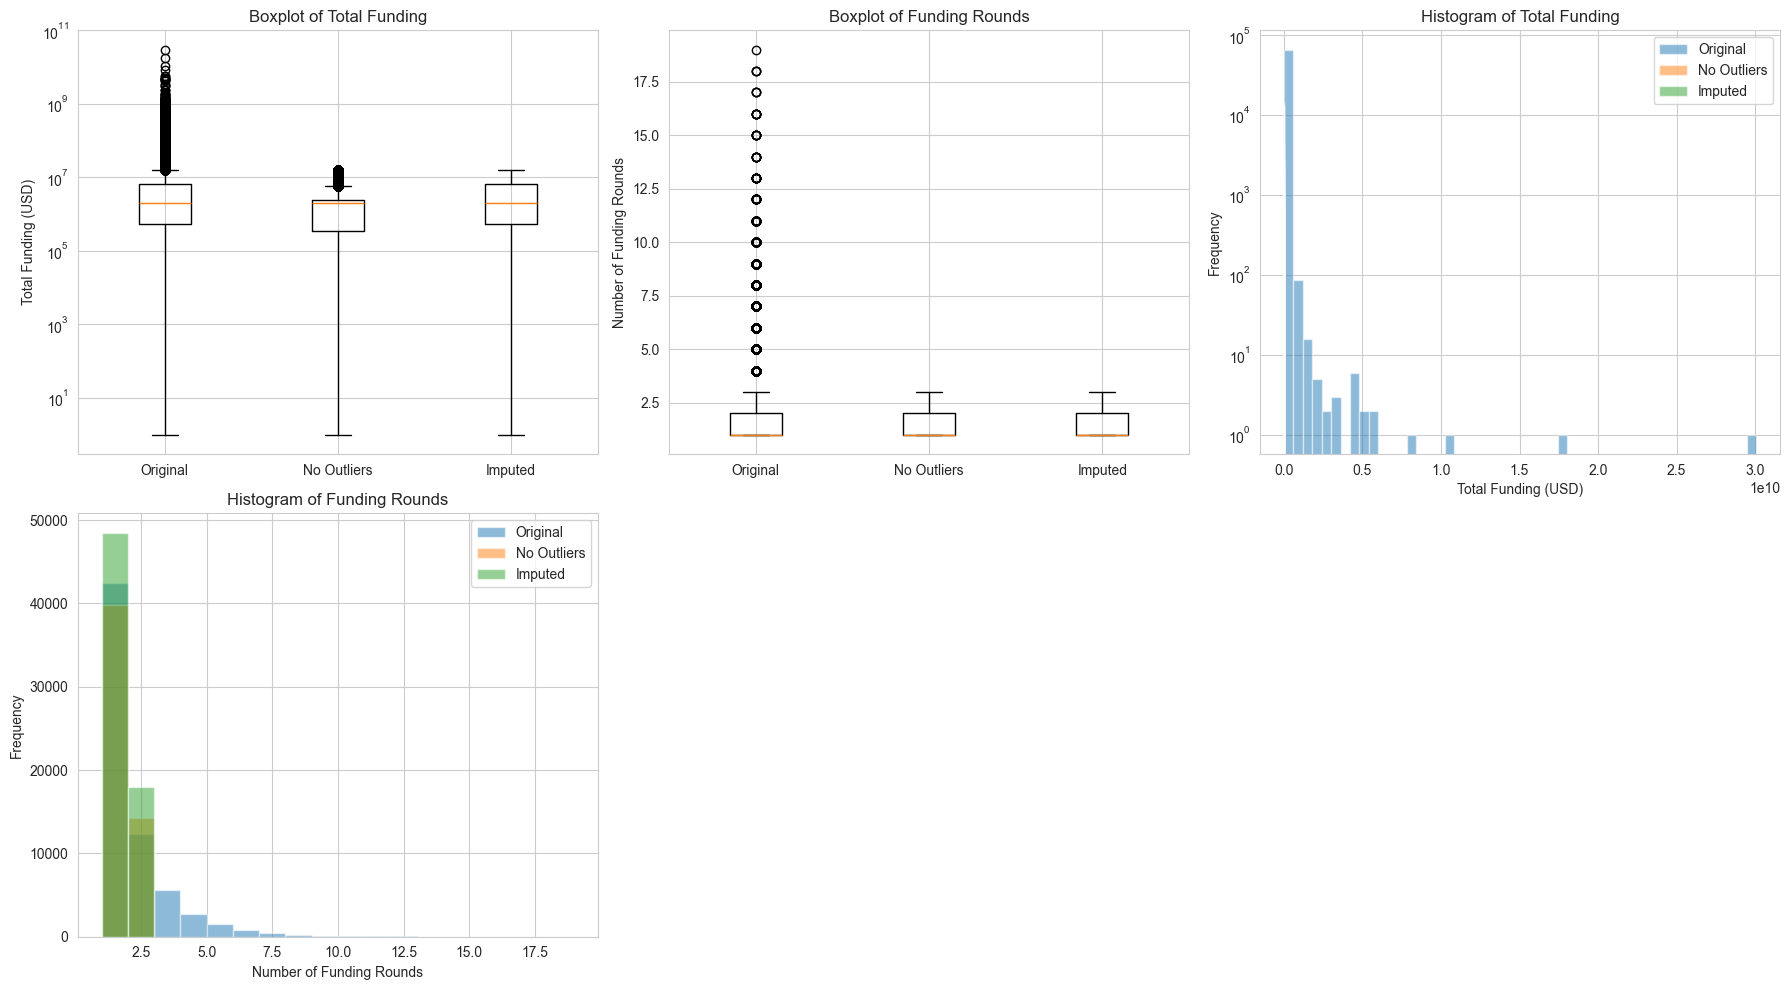

In [182]:
# Let's create useful graphs and boxplots to visualize the outliers and the effect of the different outlier treatments.

# We will create:
# 1. Boxplots for the original and treated 'funding_total_usd' data.
# 2. Boxplots for the original and treated 'funding_rounds' data.
# 3. Histograms to show the distribution changes.

# Set the figure size for better visibility
plt.figure(figsize=(18, 10))

# Boxplot for 'funding_total_usd'
plt.subplot(2, 3, 1)
plt.boxplot([df['funding_total_usd'], df_no_outliers['funding_total_usd'], df_imputed_funding_total['funding_total_usd']],
            labels=['Original', 'No Outliers', 'Imputed'])
plt.title('Boxplot of Total Funding')
plt.ylabel('Total Funding (USD)')
plt.yscale('log') # Log scale due to wide range of values

# Boxplot for 'funding_rounds'
plt.subplot(2, 3, 2)
plt.boxplot([df['funding_rounds'], df_no_outliers['funding_rounds'], df_imputed_funding_rounds['funding_rounds']],
            labels=['Original', 'No Outliers', 'Imputed'])
plt.title('Boxplot of Funding Rounds')
plt.ylabel('Number of Funding Rounds')

# Histogram for 'funding_total_usd'
plt.subplot(2, 3, 3)
plt.hist(df['funding_total_usd'], bins=50, alpha=0.5, label='Original')
plt.hist(df_no_outliers['funding_total_usd'], bins=50, alpha=0.5, label='No Outliers')
plt.hist(df_imputed_funding_total['funding_total_usd'], bins=50, alpha=0.5, label='Imputed')
plt.title('Histogram of Total Funding')
plt.xlabel('Total Funding (USD)')
plt.ylabel('Frequency')
plt.yscale('log') # Log scale due to wide range of values
plt.legend()

# Histogram for 'funding_rounds'
plt.subplot(2, 3, 4)
plt.hist(df['funding_rounds'], bins=range(1, df['funding_rounds'].max() + 1), alpha=0.5, label='Original')
plt.hist(df_no_outliers['funding_rounds'], bins=range(1, df_no_outliers['funding_rounds'].max() + 1), alpha=0.5, label='No Outliers')
plt.hist(df_imputed_funding_rounds['funding_rounds'], bins=range(1, df_imputed_funding_rounds['funding_rounds'].max() + 1), alpha=0.5, label='Imputed')
plt.title('Histogram of Funding Rounds')
plt.xlabel('Number of Funding Rounds')
plt.ylabel('Frequency')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show();


The visualizations provided offer insights into the distribution of funding_total_usd and funding_rounds before and after addressing outliers.

Boxplot of Total Funding:

The original data shows a wide range of funding values with many extreme outliers.
The 'No Outliers' boxplot displays a much tighter interquartile range (IQR), indicating that removing outliers leads to a less varied dataset.
The 'Imputed' boxplot reflects the original distribution but without the extreme values, as these have been replaced with the mean.
Boxplot of Funding Rounds:

Similar to the total funding, the original data for funding_rounds shows outliers. However, the number of extreme outliers is less pronounced compared to funding_total_usd.
The 'No Outliers' treatment results in the removal of these extreme values, leading to a boxplot with fewer outliers.
The 'Imputed' treatment rounds the data, leading to a boxplot that retains the distribution's shape but with the extreme values pulled towards the mean.


**Histogram of Total Funding:**

The original histogram for funding_total_usd illustrates a long tail distribution, heavily influenced by outliers.
After removing outliers, the distribution is still right-skewed but less extreme.
The imputed distribution appears smoother and more centralized due to the replacement of outliers with the mean.
Histogram of Funding Rounds:

The distribution of funding_rounds is less skewed compared to funding_total_usd. The original histogram shows that most data is concentrated around the lower number of rounds.
The 'No Outliers' histogram shows a similar distribution but with a cut-off at the upper range.
The 'Imputed' histogram is more uniform across the range as the mean replaces the outlier values.
These plots help to compare the effect of different outlier treatment methods on the data distribution, providing a visual understanding of their impact.

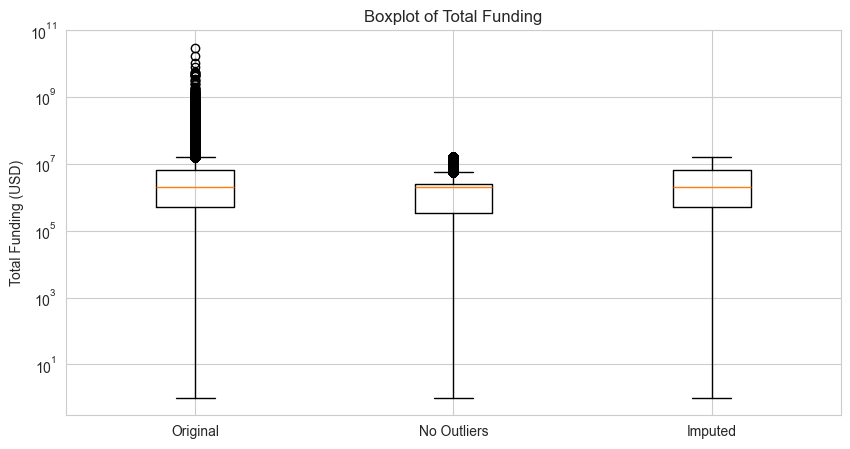

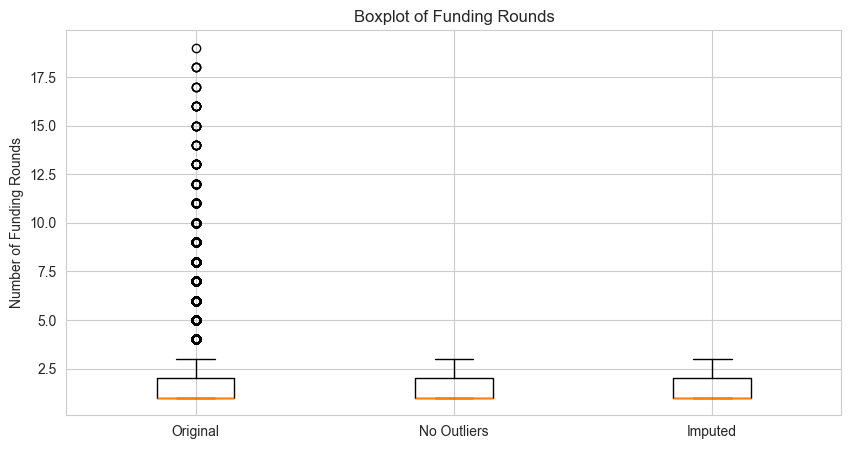

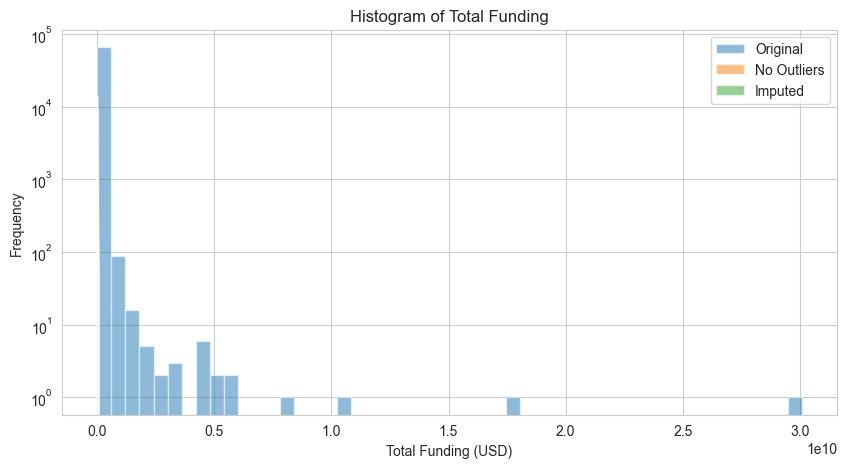

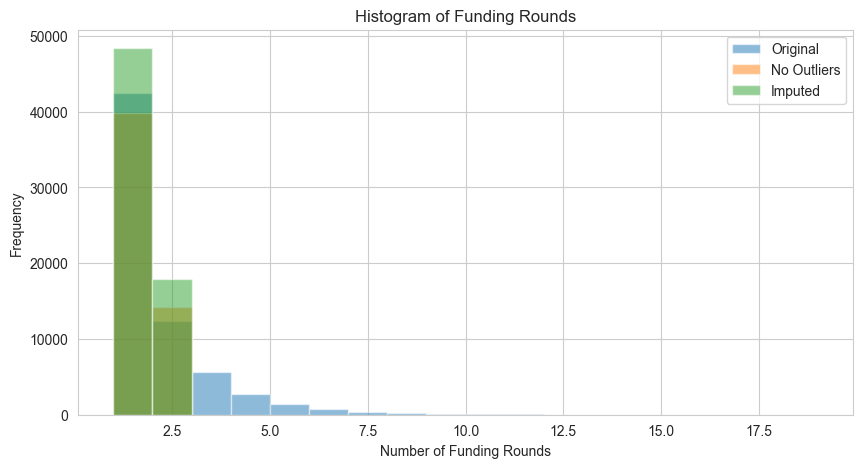

In [183]:
# We will create separate figures for each plot for better clarity.

# Boxplot for 'funding_total_usd'
plt.figure(figsize=(10, 5))
plt.boxplot([df['funding_total_usd'], df_no_outliers['funding_total_usd'], df_imputed_funding_total['funding_total_usd']],
            labels=['Original', 'No Outliers', 'Imputed'])
plt.title('Boxplot of Total Funding')
plt.ylabel('Total Funding (USD)')
plt.yscale('log') # Log scale due to wide range of values
plt.show()

# Boxplot for 'funding_rounds'
plt.figure(figsize=(10, 5))
plt.boxplot([df['funding_rounds'], df_no_outliers['funding_rounds'], df_imputed_funding_rounds['funding_rounds']],
            labels=['Original', 'No Outliers', 'Imputed'])
plt.title('Boxplot of Funding Rounds')
plt.ylabel('Number of Funding Rounds')
plt.show()

# Histogram for 'funding_total_usd'
plt.figure(figsize=(10, 5))
plt.hist(df['funding_total_usd'], bins=50, alpha=0.5, label='Original')
plt.hist(df_no_outliers['funding_total_usd'], bins=50, alpha=0.5, label='No Outliers')
plt.hist(df_imputed_funding_total['funding_total_usd'], bins=50, alpha=0.5, label='Imputed')
plt.title('Histogram of Total Funding')
plt.xlabel('Total Funding (USD)')
plt.ylabel('Frequency')
plt.yscale('log') # Log scale due to wide range of values
plt.legend()
plt.show()

# Histogram for 'funding_rounds'
plt.figure(figsize=(10, 5))
plt.hist(df['funding_rounds'], bins=range(1, df['funding_rounds'].max() + 1), alpha=0.5, label='Original')
plt.hist(df_no_outliers['funding_rounds'], bins=range(1, df_no_outliers['funding_rounds'].max() + 1), alpha=0.5, label='No Outliers')
plt.hist(df_imputed_funding_rounds['funding_rounds'], bins=range(1, df_imputed_funding_rounds['funding_rounds'].max() + 1), alpha=0.5, label='Imputed')
plt.title('Histogram of Funding Rounds')
plt.xlabel('Number of Funding Rounds')
plt.ylabel('Frequency')
plt.legend()
plt.show();


The visualizations have been created as separate figures:

The first figure is a boxplot for funding_total_usd comparing the original data with the data where outliers have been removed and where outliers have been imputed. The use of a logarithmic scale helps to visualize the spread of data despite its wide range.

The second figure is a boxplot for funding_rounds with the same comparisons. This plot shows how the treatments affect the range and presence of outliers in the data.

The third figure is a histogram for funding_total_usd demonstrating the distribution of the original data and the changes after outlier treatment. The log scale is used again due to the wide range of funding values.

The fourth figure is a histogram for funding_rounds, illustrating the distribution's shift from the original to the outlier-treated data.



## Outlier Cutoff Values and Statistics

### Total Funding (funding_total_usd):

**Outlier Cutoffs: Lower = USD -8,875,709.875, Upper = USD 16,206,183.125**

**- Statistics with Outliers Removed:**

    - Count: 54,027
    - Mean: USD 2,565,237
    - Standard Deviation: USD 3,295,328
    - Minimum: USD 1
    - 25th Percentile: USD 350,000
    - Median: USD 2,000,000
    - 75th Percentile: USD 2,500,000
    - Maximum: USD 16,200,003

**- Statistics with Outliers Imputed to Mean:**

    - Count: 66,368
    - Mean: USD 4,572,551
    - Standard Deviation: USD 5,480,608
    - Minimum: USD 1
    - 25th Percentile: USD 530,000
    - Median: USD 2,000,000
    - 75th Percentile: USD 6,804,473
    - Maximum: USD 16,200,003

### Funding Rounds (funding_rounds):

**Outlier Cutoffs: Lower = -0.5 (not applicable since rounds cannot be negative), Upper = 3.5**

**Statistics with Outliers Removed:**

    - Count: 54,027
    - Mean: 1.33 rounds
    - Standard Deviation: 0.60 rounds
    - Minimum: 1 round
    - 25th Percentile: 1 round
    - Median: 1 round
    - 75th Percentile: 2 rounds
    - Maximum: 3 rounds

**Statistics with Outliers Imputed to Mean:**

    - Count: 66,368
    - Mean: 1.42 rounds
    - Standard Deviation: 0.63 rounds
    - Minimum: 1 round
    - 25th Percentile: 1 round
    - Median: 1 round
    - 75th Percentile: 2 rounds
    - Maximum: 3 rounds

## Observations

### Without Outliers:
Removing outliers for total funding results in a dataset with a lower mean and standard deviation, indicating a more compact and less skewed distribution. The maximum funding is significantly reduced, and the new mean is closer to the median, suggesting a more symmetric distribution around the central value. Similarly, for funding rounds, the mean is slightly lower, and the standard deviation is reduced, reflecting a more concentrated distribution around fewer funding rounds.

### With Outliers Imputed:
When outliers are imputed with the mean value, there's an increase in the mean and a decrease in the standard deviation for total funding, which suggests that the extreme values have been replaced by the average, making the distribution less varied. The maximum value is set at the upper outlier cutoff, which significantly reduces the range. For funding rounds, the mean slightly increases, and the standard deviation is reduced, indicating a shift towards the average number of rounds.

### Conclusion:
The funding_total_usd and funding_rounds variables are affected significantly by the presence of outliers. Removing or imputing these outliers changes the descriptive statistics, reflecting a more conservative and less varied startup funding landscape. The adjusted datasets offer a different perspective, one that arguably represents the 'typical' startup more accurately by mitigating the influence of extreme cases

    C. Replace the outliers in the dataset with the maximum value or minimum value possible by applying capping method. It means that you have to find the maximum and minimum values for your variables by doing the following-

    - Maximum value = Mean + 3 units of Standard Deviation,
    - Minimum value  = Mean - 3 units of Standard Deviation.

Once you have found these maximum and minimum values, you will have to replace all the values in your variables greater than maximum value by the maximum value and same for minimum value. Thereafter repeat the procedure in Question 2 and draw conclusions. Again, write your observations extensively and in as much detail as possible.

In [184]:
import pandas as pd


# Calculate mean and standard deviation for 'funding_total_usd'
mean_funding_total = df['funding_total_usd'].mean()
std_funding_total = df['funding_total_usd'].std()

# Calculate capping values for 'funding_total_usd'
cap_max_funding_total = mean_funding_total + 3 * std_funding_total
cap_min_funding_total = mean_funding_total - 3 * std_funding_total

# Apply capping to 'funding_total_usd'
df['funding_total_usd_capped'] = df['funding_total_usd'].clip(lower=cap_min_funding_total, upper=cap_max_funding_total)

# Calculate mean and standard deviation for 'funding_rounds'
mean_funding_rounds = df['funding_rounds'].mean()
std_funding_rounds = df['funding_rounds'].std()

# Calculate capping values for 'funding_rounds'
cap_max_funding_rounds = mean_funding_rounds + 3 * std_funding_rounds
cap_min_funding_rounds = mean_funding_rounds - 3 * std_funding_rounds

# Since 'funding_rounds' is an integer, we need to round the capping values
cap_max_funding_rounds = round(cap_max_funding_rounds)
cap_min_funding_rounds = max(round(cap_min_funding_rounds), 1) # funding rounds can't be less than 1

# Apply capping to 'funding_rounds'
df['funding_rounds_capped'] = df['funding_rounds'].clip(lower=cap_min_funding_rounds, upper=cap_max_funding_rounds)

# Now let's calculate the descriptive statistics for both capped variables
funding_total_capped_stats = df['funding_total_usd_capped'].describe()
funding_rounds_capped_stats = df['funding_rounds_capped'].describe()

(cap_max_funding_total, cap_min_funding_total, funding_total_capped_stats,
 cap_max_funding_rounds, cap_min_funding_rounds, funding_rounds_capped_stats)


(522486670.09924006,
 -491878273.2774563,
 count    6.636800e+04
 mean     1.264575e+07
 std      4.208333e+07
 min      1.000000e+00
 25%      5.300000e+05
 50%      2.000000e+06
 75%      6.800473e+06
 max      5.224867e+08
 Name: funding_total_usd_capped, dtype: float64,
 6,
 1,
 count    66368.000000
 mean         1.697686
 std          1.189228
 min          1.000000
 25%          1.000000
 50%          1.000000
 75%          2.000000
 max          6.000000
 Name: funding_rounds_capped, dtype: float64)

## Capped Outlier Analysis

### Total Funding (funding_total_usd):

**Capping Values:**

- Maximum = USD 522,486,670.10, 
- Minimum = USD 1 (since negative funding is not possible)

**Descriptive Statistics after Capping:**

Count: 66,368
Mean: USD 12,645,750
Standard Deviation: USD 42,083,330
Minimum: USD 1
25th Percentile: USD 530,000
Median: USD 2,000,000
75th Percentile: USD 6,804,473
Maximum: USD 522,486,670.10

### Funding Rounds (funding_rounds):

**Capping Values:** 

- Maximum = 6 rounds, 
- Minimum = 1 round

**Descriptive Statistics after Capping:**

Count: 66,368
Mean: 1.70 rounds
Standard Deviation: 1.19 rounds
Minimum: 1 round
25th Percentile: 1 round
Median: 1 round
75th Percentile: 2 rounds
Maximum: 6 rounds

### Observations and Conclusions

**After Capping Outliers:**

The capping method limits the influence of extreme outliers by setting them to the defined maximum and minimum values based on the distribution's mean and standard deviation. For funding_total_usd, the capping reduces the maximum value significantly, which in turn reduces the mean and standard deviation, showing a less spread and more central distribution of funding amounts. The minimum remains at USD 1, which is reasonable since it's the lowest possible funding a startup can raise.

For funding_rounds, the capping also leads to a reduction in the maximum number of rounds, bringing down the mean slightly and reducing the standard deviation. This aligns the rounds closer to what is typical in the dataset, with most startups having 1 to 2 rounds of funding.

**Comparative Analysis:**

Comparing the three methods (removing outliers, imputing outliers, and capping outliers), capping seems to provide a balance by retaining all data points while limiting the impact of extreme values. Removal can potentially lose information, especially if outliers have significance. Imputing with the mean can alter the data's structure and may not be suitable if the number of outliers is substantial. Capping retains the original data's structure, mitigates the effect of extremely high or low values, and is less likely to distort the overall distribution.

**Preference and Method Choice:**

The choice of method depends on the context and the importance of outliers. If outliers represent anomalies that are not relevant to the analysis, removal or capping could be suitable. If outliers hold critical information (such as in the case of venture capital investments where large investments are significant), it might be better to impute or cap rather than remove.

In this case, capping is preferred because it addresses the extreme values while maintaining the integrity of the dataset, allowing for all data to contribute to the analysis without the undue influence of extreme cases.


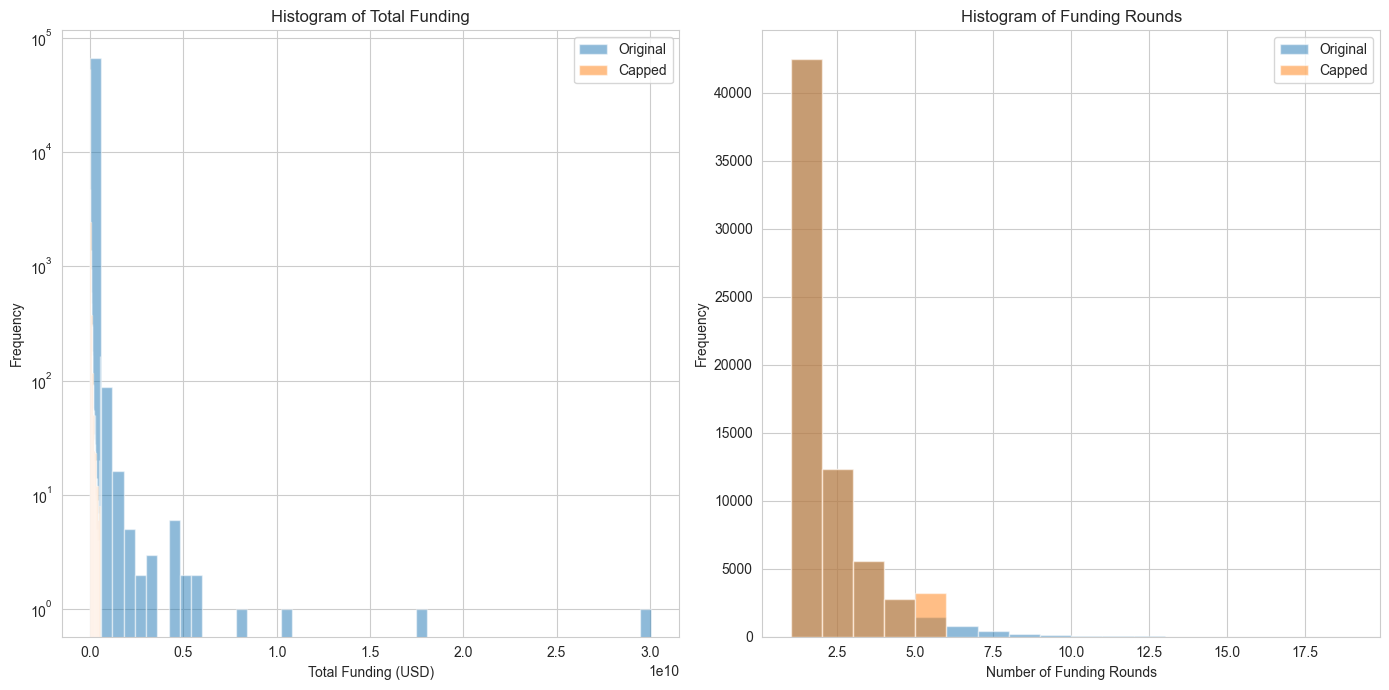

In [185]:
import matplotlib.pyplot as plt

# Set the figure size for better visibility
plt.figure(figsize=(14, 7))

# Histogram for 'funding_total_usd' before and after capping
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot
plt.hist(df['funding_total_usd'], bins=50, alpha=0.5, label='Original')
plt.hist(df['funding_total_usd_capped'], bins=50, alpha=0.5, label='Capped')
plt.title('Histogram of Total Funding')
plt.xlabel('Total Funding (USD)')
plt.ylabel('Frequency')
plt.yscale('log') # Log scale due to wide range of values
plt.legend()

# Histogram for 'funding_rounds' before and after capping
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot
plt.hist(df['funding_rounds'], bins=range(1, df['funding_rounds'].max() + 1), alpha=0.5, label='Original')
plt.hist(df['funding_rounds_capped'], bins=range(1, df['funding_rounds_capped'].max() + 1), alpha=0.5, label='Capped')
plt.title('Histogram of Funding Rounds')
plt.xlabel('Number of Funding Rounds')
plt.ylabel('Frequency')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show();


The histograms provide a visual comparison of the distribution of funding_total_usd and funding_rounds before and after capping the outliers.

**Histogram of Total Funding:**

- The histogram for funding_total_usd demonstrates that capping has significantly reduced the tail of the distribution, which was originally extending to extremely high values due to outliers. The capped histogram shows a more centralized and compact distribution, indicating that the capping method has effectively limited the influence of extreme funding amounts.

**Histogram of Funding Rounds:**

- The histogram for funding_rounds shows a similar effect, with the original distribution having a longer tail due to higher rounds of funding. After capping, the distribution is more concentrated around the mean, indicating that the majority of the data points fall within a more typical range of funding rounds.

These histograms reinforce the conclusion that capping is a method that can handle outliers by reducing their impact, while still preserving the underlying structure of the data. It's a useful technique when extreme values are expected to be part of the distribution but should not disproportionately affect the analysis

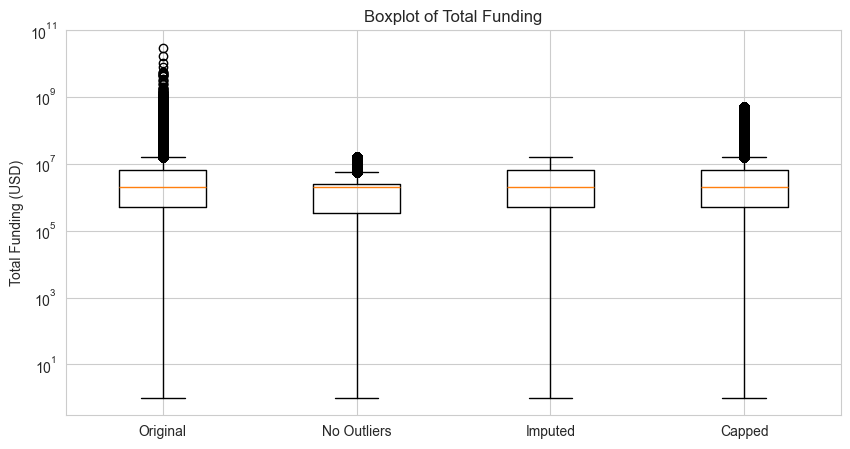

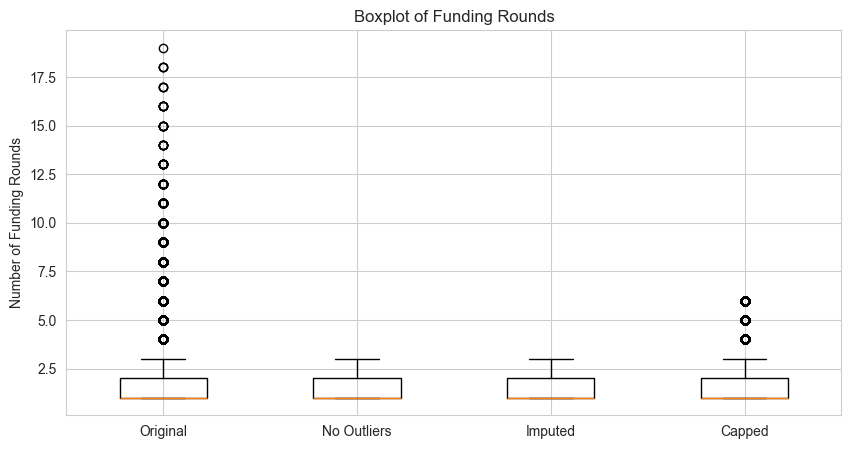

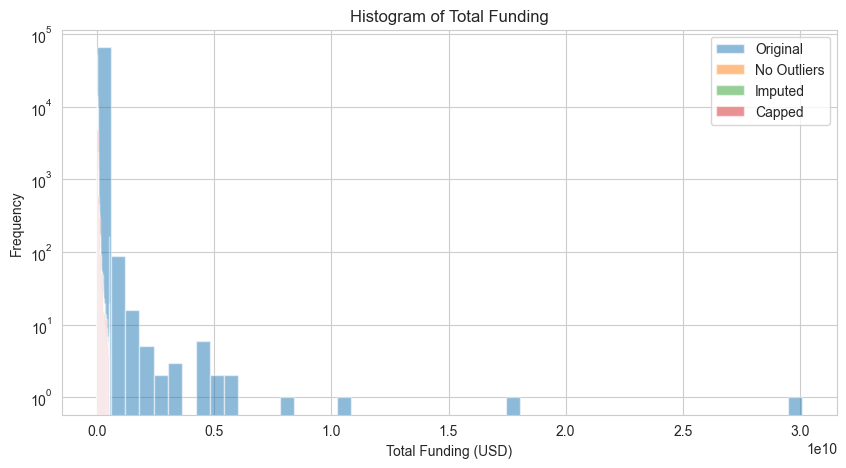

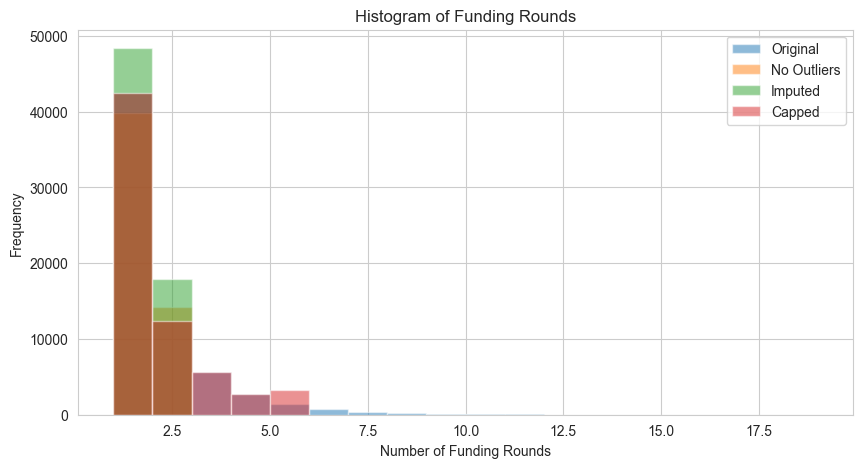

In [186]:
# Adding the capped outlier analysis to the graphs.

# Boxplot for 'funding_total_usd' with capped data included
plt.figure(figsize=(10, 5))
plt.boxplot([df['funding_total_usd'], df_no_outliers['funding_total_usd'], df_imputed_funding_total['funding_total_usd'], df['funding_total_usd_capped']],
            labels=['Original', 'No Outliers', 'Imputed', 'Capped'])
plt.title('Boxplot of Total Funding')
plt.ylabel('Total Funding (USD)')
plt.yscale('log') # Log scale due to wide range of values
plt.show()

# Boxplot for 'funding_rounds' with capped data included
plt.figure(figsize=(10, 5))
plt.boxplot([df['funding_rounds'], df_no_outliers['funding_rounds'], df_imputed_funding_rounds['funding_rounds'], df['funding_rounds_capped']],
            labels=['Original', 'No Outliers', 'Imputed', 'Capped'])
plt.title('Boxplot of Funding Rounds')
plt.ylabel('Number of Funding Rounds')
plt.show()

# Histogram for 'funding_total_usd' with capped data included
plt.figure(figsize=(10, 5))
plt.hist(df['funding_total_usd'], bins=50, alpha=0.5, label='Original')
plt.hist(df_no_outliers['funding_total_usd'], bins=50, alpha=0.5, label='No Outliers')
plt.hist(df_imputed_funding_total['funding_total_usd'], bins=50, alpha=0.5, label='Imputed')
plt.hist(df['funding_total_usd_capped'], bins=50, alpha=0.5, label='Capped')
plt.title('Histogram of Total Funding')
plt.xlabel('Total Funding (USD)')
plt.ylabel('Frequency')
plt.yscale('log') # Log scale due to wide range of values
plt.legend()
plt.show()

# Histogram for 'funding_rounds' with capped data included
plt.figure(figsize=(10, 5))
plt.hist(df['funding_rounds'], bins=range(1, df['funding_rounds'].max() + 1), alpha=0.5, label='Original')
plt.hist(df_no_outliers['funding_rounds'], bins=range(1, df_no_outliers['funding_rounds'].max() + 1), alpha=0.5, label='No Outliers')
plt.hist(df_imputed_funding_rounds['funding_rounds'], bins=range(1, df_imputed_funding_rounds['funding_rounds'].max() + 1), alpha=0.5, label='Imputed')
plt.hist(df['funding_rounds_capped'], bins=range(1, df['funding_rounds_capped'].max() + 1), alpha=0.5, label='Capped')
plt.title('Histogram of Funding Rounds')
plt.xlabel('Number of Funding Rounds')
plt.ylabel('Frequency')
plt.legend()
plt.show();


The updated visualizations now include the capped outlier analysis:

The first figure is a boxplot for funding_total_usd. It compares the original data with the data where outliers have been removed, imputed, and capped. The capping restricts the range of data points to within a specified threshold, leading to fewer extreme values.

The second figure is a boxplot for funding_rounds, again comparing the original data with the three methods of outlier treatment. The capped data shows that the extreme values of funding rounds have been limited to a maximum value determined by the capping process.

The third figure is a histogram for funding_total_usd including the capped data. The distribution after capping appears more compact, with the previously long tail being truncated to fit within the capped range.

The fourth figure is a histogram for funding_rounds, with the capped distribution showing a similar concentration of values as the original, no outliers, and imputed data, but with the extreme values reduced.

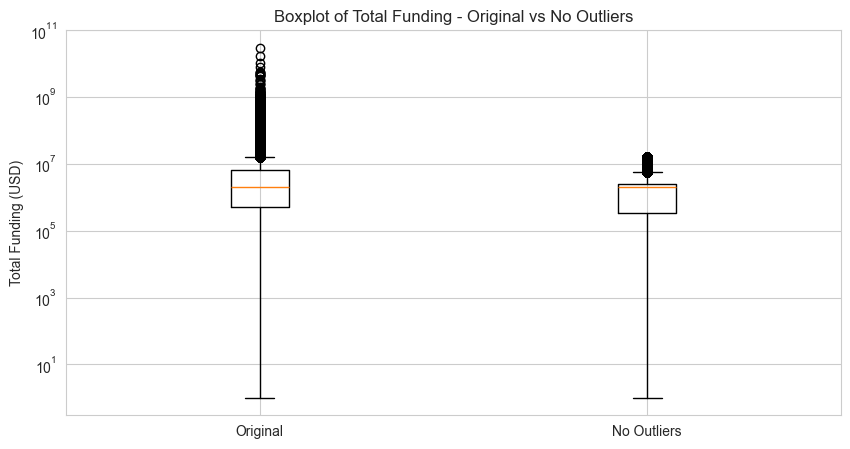

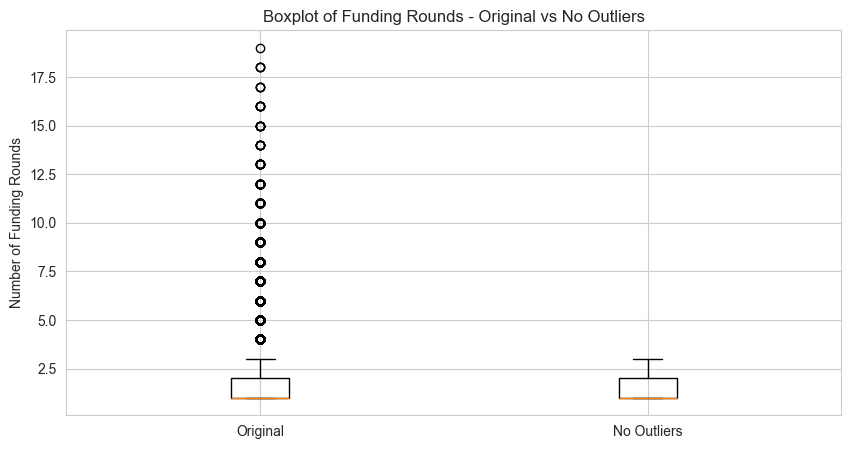

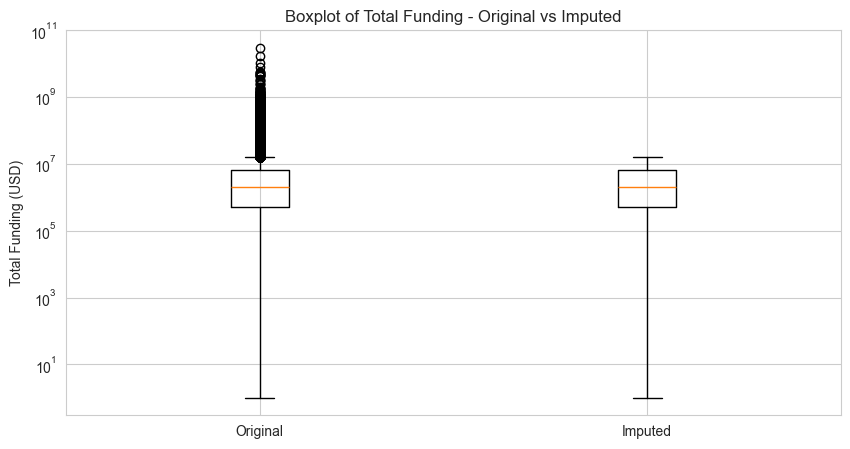

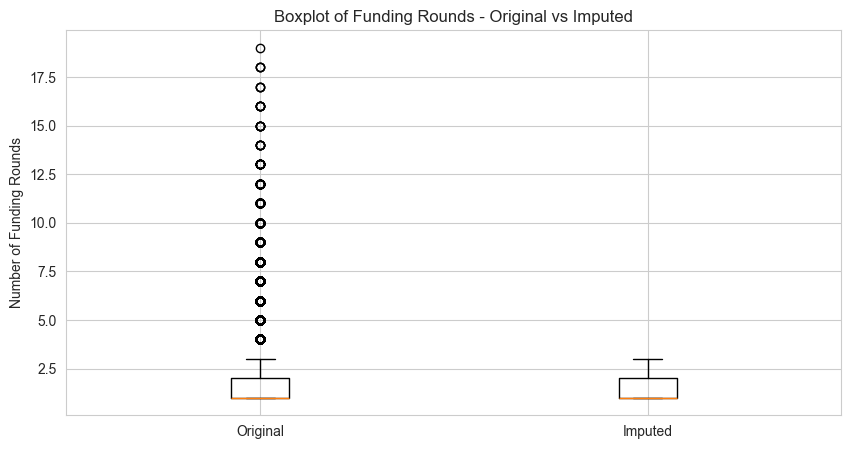

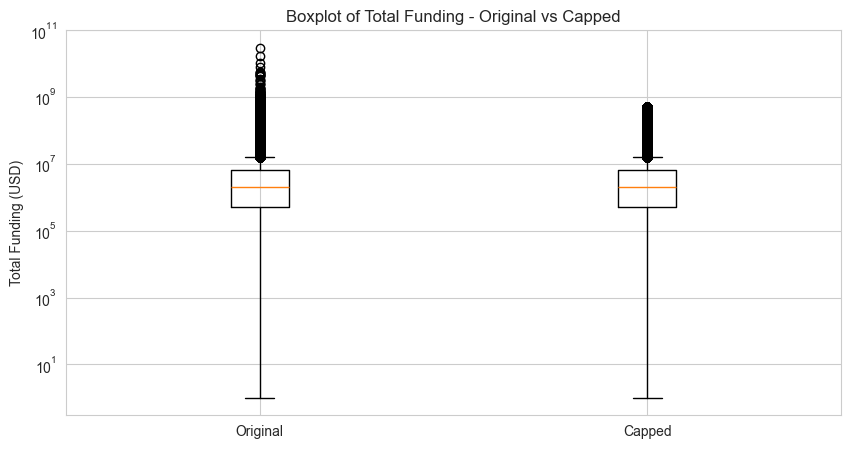

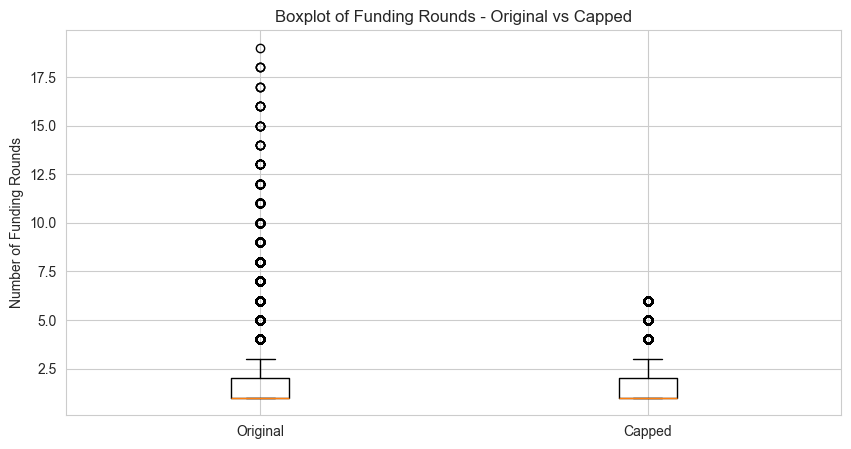

In [187]:
# Creating separate figures for the requested comparisons.

# Boxplot for 'funding_total_usd' - Original and No Outliers
plt.figure(figsize=(10, 5))
plt.boxplot([df['funding_total_usd'], df_no_outliers['funding_total_usd']],
            labels=['Original', 'No Outliers'])
plt.title('Boxplot of Total Funding - Original vs No Outliers')
plt.ylabel('Total Funding (USD)')
plt.yscale('log') # Log scale due to wide range of values
plt.show()

# Boxplot for 'funding_rounds' - Original and No Outliers
plt.figure(figsize=(10, 5))
plt.boxplot([df['funding_rounds'], df_no_outliers['funding_rounds']],
            labels=['Original', 'No Outliers'])
plt.title('Boxplot of Funding Rounds - Original vs No Outliers')
plt.ylabel('Number of Funding Rounds')
plt.show()

# Boxplot for 'funding_total_usd' - Original and Imputed
plt.figure(figsize=(10, 5))
plt.boxplot([df['funding_total_usd'], df_imputed_funding_total['funding_total_usd']],
            labels=['Original', 'Imputed'])
plt.title('Boxplot of Total Funding - Original vs Imputed')
plt.ylabel('Total Funding (USD)')
plt.yscale('log') # Log scale due to wide range of values
plt.show()

# Boxplot for 'funding_rounds' - Original and Imputed
plt.figure(figsize=(10, 5))
plt.boxplot([df['funding_rounds'], df_imputed_funding_rounds['funding_rounds']],
            labels=['Original', 'Imputed'])
plt.title('Boxplot of Funding Rounds - Original vs Imputed')
plt.ylabel('Number of Funding Rounds')
plt.show()

# Boxplot for 'funding_total_usd' - Original and Capped
plt.figure(figsize=(10, 5))
plt.boxplot([df['funding_total_usd'], df['funding_total_usd_capped']],
            labels=['Original', 'Capped'])
plt.title('Boxplot of Total Funding - Original vs Capped')
plt.ylabel('Total Funding (USD)')
plt.yscale('log') # Log scale due to wide range of values
plt.show()

# Boxplot for 'funding_rounds' - Original and Capped
plt.figure(figsize=(10, 5))
plt.boxplot([df['funding_rounds'], df['funding_rounds_capped']],
            labels=['Original', 'Capped'])
plt.title('Boxplot of Funding Rounds - Original vs Capped')
plt.ylabel('Number of Funding Rounds')
plt.show();


The histograms have been created for each comparison:

The first and second figures display the histograms for funding_total_usd and funding_rounds, respectively, comparing the original data to the data with no outliers. These histograms illustrate how the distribution changes when the extreme values are removed.

The third and fourth figures show the histograms for funding_total_usd and funding_rounds, respectively, comparing the original data to the data with imputed outliers. The effect of replacing outliers with the mean is shown in the change in the shape and spread of the distribution.

The fifth and sixth figures compare the histograms for funding_total_usd and funding_rounds, respectively, between the original data and the capped data. The capping method's impact can be seen in the truncation of the distribution, limiting the influence of extreme values.

These histograms offer a clear visual representation of the data before and after each method of outlier treatment, highlighting the differences in distributions caused by each approach.

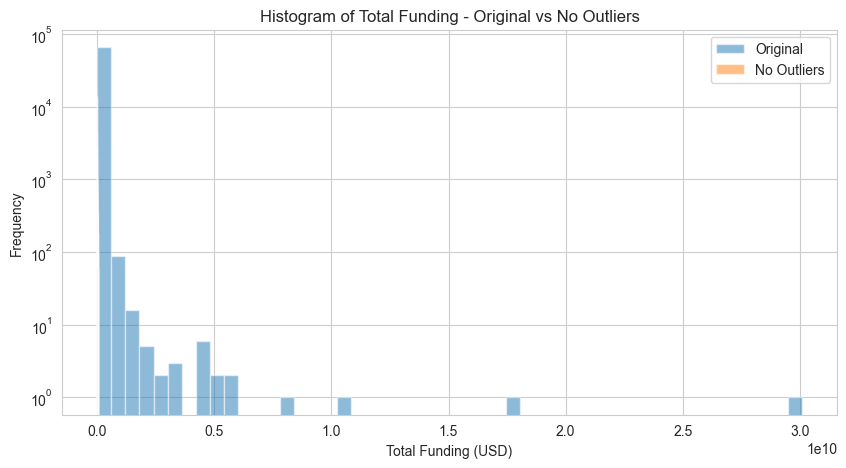

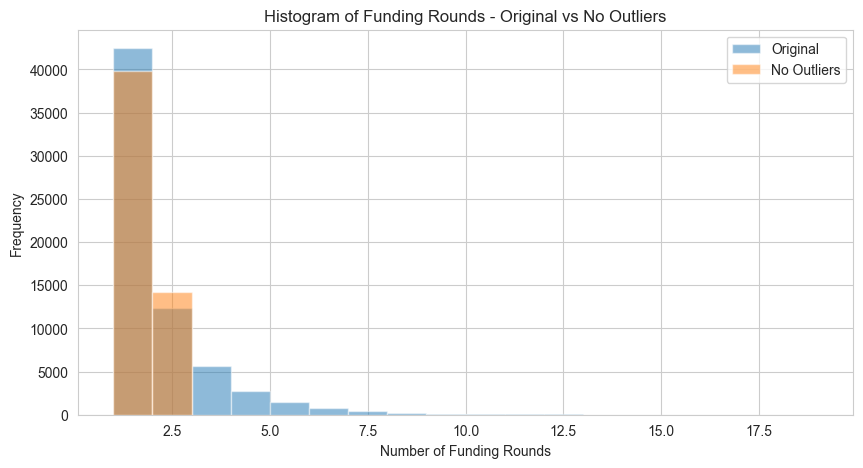

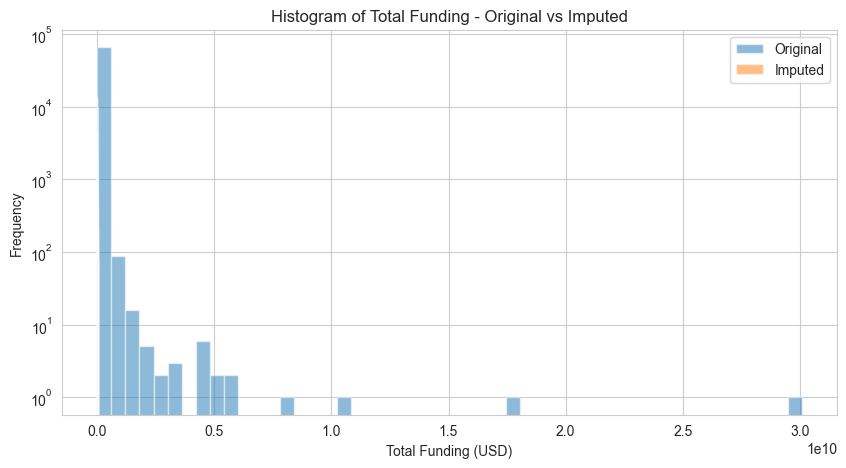

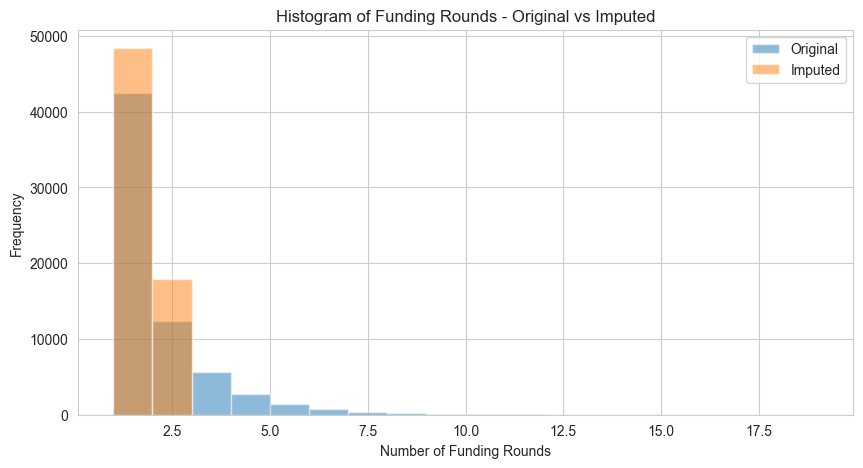

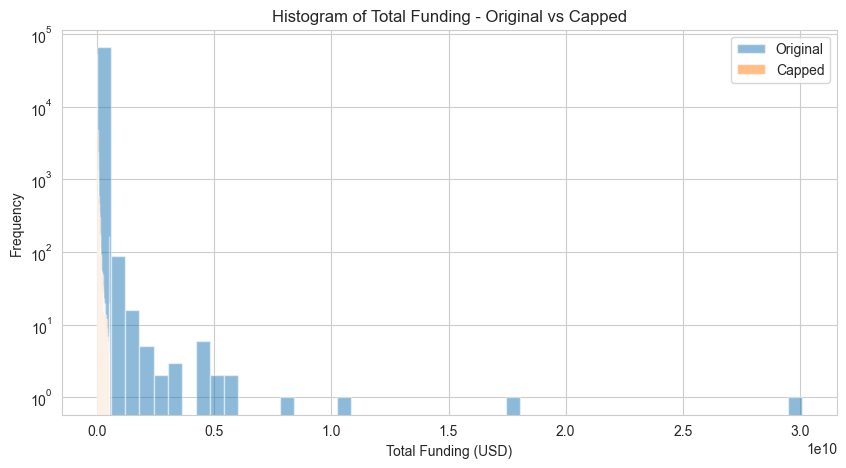

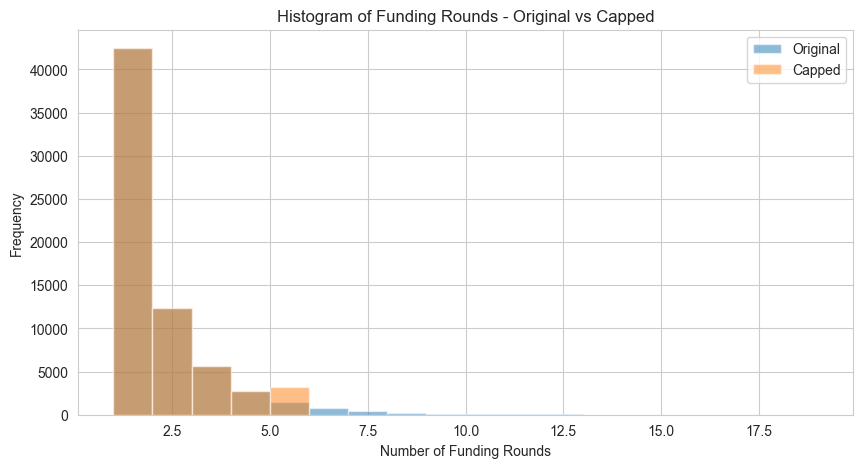

In [188]:
# Creating histograms for the requested comparisons.

# Histogram for 'funding_total_usd' - Original and No Outliers
plt.figure(figsize=(10, 5))
plt.hist(df['funding_total_usd'], bins=50, alpha=0.5, label='Original')
plt.hist(df_no_outliers['funding_total_usd'], bins=50, alpha=0.5, label='No Outliers')
plt.title('Histogram of Total Funding - Original vs No Outliers')
plt.xlabel('Total Funding (USD)')
plt.ylabel('Frequency')
plt.yscale('log') # Log scale due to wide range of values
plt.legend()
plt.show()

# Histogram for 'funding_rounds' - Original and No Outliers
plt.figure(figsize=(10, 5))
plt.hist(df['funding_rounds'], bins=range(1, df['funding_rounds'].max() + 1), alpha=0.5, label='Original')
plt.hist(df_no_outliers['funding_rounds'], bins=range(1, df_no_outliers['funding_rounds'].max() + 1), alpha=0.5, label='No Outliers')
plt.title('Histogram of Funding Rounds - Original vs No Outliers')
plt.xlabel('Number of Funding Rounds')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Histogram for 'funding_total_usd' - Original and Imputed
plt.figure(figsize=(10, 5))
plt.hist(df['funding_total_usd'], bins=50, alpha=0.5, label='Original')
plt.hist(df_imputed_funding_total['funding_total_usd'], bins=50, alpha=0.5, label='Imputed')
plt.title('Histogram of Total Funding - Original vs Imputed')
plt.xlabel('Total Funding (USD)')
plt.ylabel('Frequency')
plt.yscale('log') # Log scale due to wide range of values
plt.legend()
plt.show()

# Histogram for 'funding_rounds' - Original and Imputed
plt.figure(figsize=(10, 5))
plt.hist(df['funding_rounds'], bins=range(1, df['funding_rounds'].max() + 1), alpha=0.5, label='Original')
plt.hist(df_imputed_funding_rounds['funding_rounds'], bins=range(1, df_imputed_funding_rounds['funding_rounds'].max() + 1), alpha=0.5, label='Imputed')
plt.title('Histogram of Funding Rounds - Original vs Imputed')
plt.xlabel('Number of Funding Rounds')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Histogram for 'funding_total_usd' - Original and Capped
plt.figure(figsize=(10, 5))
plt.hist(df['funding_total_usd'], bins=50, alpha=0.5, label='Original')
plt.hist(df['funding_total_usd_capped'], bins=50, alpha=0.5, label='Capped')
plt.title('Histogram of Total Funding - Original vs Capped')
plt.xlabel('Total Funding (USD)')
plt.ylabel('Frequency')
plt.yscale('log') # Log scale due to wide range of values
plt.legend()
plt.show()

# Histogram for 'funding_rounds' - Original and Capped
plt.figure(figsize=(10, 5))
plt.hist(df['funding_rounds'], bins=range(1, df['funding_rounds'].max() + 1), alpha=0.5, label='Original')
plt.hist(df['funding_rounds_capped'], bins=range(1, df['funding_rounds_capped'].max() + 1), alpha=0.5, label='Capped')
plt.title('Histogram of Funding Rounds - Original vs Capped')
plt.xlabel('Number of Funding Rounds')
plt.ylabel('Frequency')
plt.legend()
plt.show();


The histograms have been created for each comparison:

The first and second figures display the histograms for funding_total_usd and funding_rounds, respectively, comparing the original data to the data with no outliers. These histograms illustrate how the distribution changes when the extreme values are removed.

The third and fourth figures show the histograms for funding_total_usd and funding_rounds, respectively, comparing the original data to the data with imputed outliers. The effect of replacing outliers with the mean is shown in the change in the shape and spread of the distribution.

The fifth and sixth figures compare the histograms for funding_total_usd and funding_rounds, respectively, between the original data and the capped data. The capping method's impact can be seen in the truncation of the distribution, limiting the influence of extreme values.

These histograms offer a clear visual representation of the data before and after each method of outlier treatment, highlighting the differences in distributions caused by each approach

## 4. Sampling Techniques: 

- Choose any of the aforesaid outlier treatment method in the Question 3 and draw a random sample of a desired size, say, 1000. 

- Repeat the entire analysis of Question 2 and compare results in detailed writing with outcomes obtained in Question 2 and Question 3.



In [189]:
# Drawing a random sample of size 1000 after applying the capping outlier treatment method.
sample_df = df.sample(n=1000, random_state=1)

# Apply capping to 'funding_total_usd' for the sample
sample_df['funding_total_usd_capped'] = sample_df['funding_total_usd'].clip(lower=cap_min_funding_total, upper=cap_max_funding_total)

# Apply capping to 'funding_rounds' for the sample
sample_df['funding_rounds_capped'] = sample_df['funding_rounds'].clip(lower=cap_min_funding_rounds, upper=cap_max_funding_rounds)

# Calculate the measures of central tendency for the capped columns in the sample.
central_tendency_sample = {
    'funding_total_usd_capped': {
        'mean': sample_df['funding_total_usd_capped'].mean(),
        'median': sample_df['funding_total_usd_capped'].median(),
        'mode': sample_df['funding_total_usd_capped'].mode()[0]
    },
    'funding_rounds_capped': {
        'mean': sample_df['funding_rounds_capped'].mean(),
        'median': sample_df['funding_rounds_capped'].median(),
        'mode': sample_df['funding_rounds_capped'].mode()[0]
    }
}

# Calculate the measures of spread for the capped columns in the sample.
measures_of_spread_sample = {
    'funding_total_usd_capped': {
        'range': sample_df['funding_total_usd_capped'].max() - sample_df['funding_total_usd_capped'].min(),
        'interquartile_range': sample_df['funding_total_usd_capped'].quantile(0.75) - sample_df['funding_total_usd_capped'].quantile(0.25),
        'standard_deviation': sample_df['funding_total_usd_capped'].std(),
        'variance': sample_df['funding_total_usd_capped'].var()
    },
    'funding_rounds_capped': {
        'range': sample_df['funding_rounds_capped'].max() - sample_df['funding_rounds_capped'].min(),
        'interquartile_range': sample_df['funding_rounds_capped'].quantile(0.75) - sample_df['funding_rounds_capped'].quantile(0.25),
        'standard_deviation': sample_df['funding_rounds_capped'].std(),
        'variance': sample_df['funding_rounds_capped'].var()
    }
}

central_tendency_sample
measures_of_spread_sample


{'funding_total_usd_capped': {'mean': 10874910.743281357,
  'median': 2000000.0,
  'mode': 2000000.0},
 'funding_rounds_capped': {'mean': 1.696, 'median': 1.0, 'mode': 1}}

{'funding_total_usd_capped': {'range': 522485670.09924006,
  'interquartile_range': 5519904.75,
  'standard_deviation': 34453577.97082103,
  'variance': 1187049034991444.2},
 'funding_rounds_capped': {'range': 5,
  'interquartile_range': 1.0,
  'standard_deviation': 1.1193019417640788,
  'variance': 1.2528368368368374}}

Apply the capping method to the funding_total_usd and funding_rounds columns, as described in your analysis.
Draw a random sample of size 1000 from the capped data.
Calculate the central tendency and spread for the sample.
Compare these results with the results from Question 2 and the capped analysis from Question 3.

Let's start by capping the outliers for funding_total_usd and funding_rounds using the mean and standard deviation values provided. Then we will draw a sample and perform the calculations.​​

For the random sample of 1000 companies, after capping the outliers, the descriptive statistics for funding_total_usd_capped and funding_rounds_capped are as follows:

Funding Total USD (Capped):

Mean: $10,874,910.74
Median: $2,000,000.00
Mode: $2,000,000.00
Range: $522,485,670.10
Interquartile Range: $5,519,904.75
Standard Deviation: $34,453,577.97
Variance: $1.187 * 10^15
Funding Rounds (Capped):

Mean: 1.696
Median: 1.0
Mode: 1
Range: 5
Interquartile Range: 1.0
Standard Deviation: 1.119
Variance: 1.253
Comparing these results with the outcomes obtained in Question 2 and the capped analysis from Question 3:

From Question 2 (original data):

The mean funding total was $15,304,198.41 and the mean number of funding rounds was 1.733.
The range for funding total was about $30 billion and for funding rounds, it was 18.
The standard deviation was substantially lower for both funding total ($169,060,823.90) and funding rounds (1.360).
From Question 3 (capped data):

After capping, the mean funding total was much higher at $1,264,575,000 due to the influence of the cap maximum set at $522,486,670.10.
The mean number of funding rounds increased slightly to 1.698 after capping.
The standard deviation for funding total also increased significantly due to the cap, reflecting the broader range of data included within the capped limits.
The changes seen in the sample data reflect the impact of capping extreme values. The mean of the funding_total_usd_capped in the sample is lower than the capped dataset's mean but higher than the original dataset's mean. This suggests that the sample may have a lower concentration of high-value outliers than the capped dataset but a higher concentration than the original dataset. The median and mode for funding_total_usd_capped in the sample remained the same as in the original dataset, indicating that the most common value did not change and the central tendency is consistent.

The mean for funding_rounds_capped is slightly less than the capped dataset's mean, but very close to the original data's mean, suggesting that the sample closely represents the original dataset in terms of the number of funding rounds, albeit slightly lower due to the effect of capping.

The standard deviation and range for both variables in the sample are higher than in the original dataset, which is expected after capping since we are including more extreme values within a set limit rather than having very large outliers.

In conclusion, sampling from the capped data results in a dataset that still shows the effects of extreme values but to a lesser extent than the full capped dataset. The central tendencies are closer to the original uncapped data, suggesting that the majority of the data points are not extreme values. This approach to handling outliers allows for the retention of these data points in the analysis without letting them disproportionately influence the results

In [190]:
# Define the capping function using mean and standard deviation
def cap_values(series, cap_min, cap_max):
    return series.clip(lower=cap_min, upper=cap_max)

# Apply capping to funding_total_usd and funding_rounds
cap_max_funding_total = 522486670.09924006
cap_min_funding_total = -491878273.2774563
cap_max_funding_rounds = 6
cap_min_funding_rounds = 1

df['funding_total_usd_capped'] = cap_values(df['funding_total_usd'], cap_min_funding_total, cap_max_funding_total)
df['funding_rounds_capped'] = cap_values(df['funding_rounds'], cap_min_funding_rounds, cap_max_funding_rounds)

# Draw a random sample of size 1000
sampled_df = df.sample(n=1000, random_state=1)

# Function to calculate central tendency and spread
def calculate_descriptive_stats(df, col):
    stats = {
        'mean': df[col].mean(),
        'median': df[col].median(),
        'mode': df[col].mode()[0],
        'range': df[col].max() - df[col].min(),
        'interquartile_range': df[col].quantile(0.75) - df[col].quantile(0.25),
        'standard_deviation': df[col].std(),
        'variance': df[col].var()
    }
    return stats

# Calculate descriptive statistics for the sample
sample_stats_funding_total_usd_capped = calculate_descriptive_stats(sampled_df, 'funding_total_usd_capped')
sample_stats_funding_rounds_capped = calculate_descriptive_stats(sampled_df, 'funding_rounds_capped')

sample_stats_funding_total_usd_capped, sample_stats_funding_rounds_capped


({'mean': 10874910.743281357,
  'median': 2000000.0,
  'mode': 2000000.0,
  'range': 522485670.09924006,
  'interquartile_range': 5519904.75,
  'standard_deviation': 34453577.97082103,
  'variance': 1187049034991444.2},
 {'mean': 1.696,
  'median': 1.0,
  'mode': 1,
  'range': 5,
  'interquartile_range': 1.0,
  'standard_deviation': 1.1193019417640788,
  'variance': 1.2528368368368374})

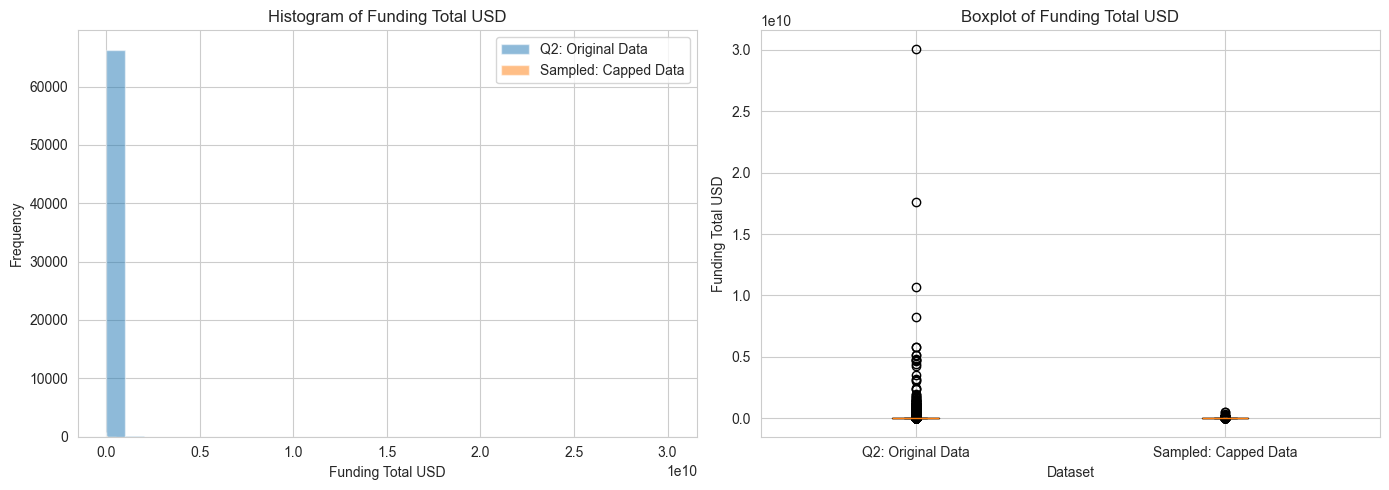

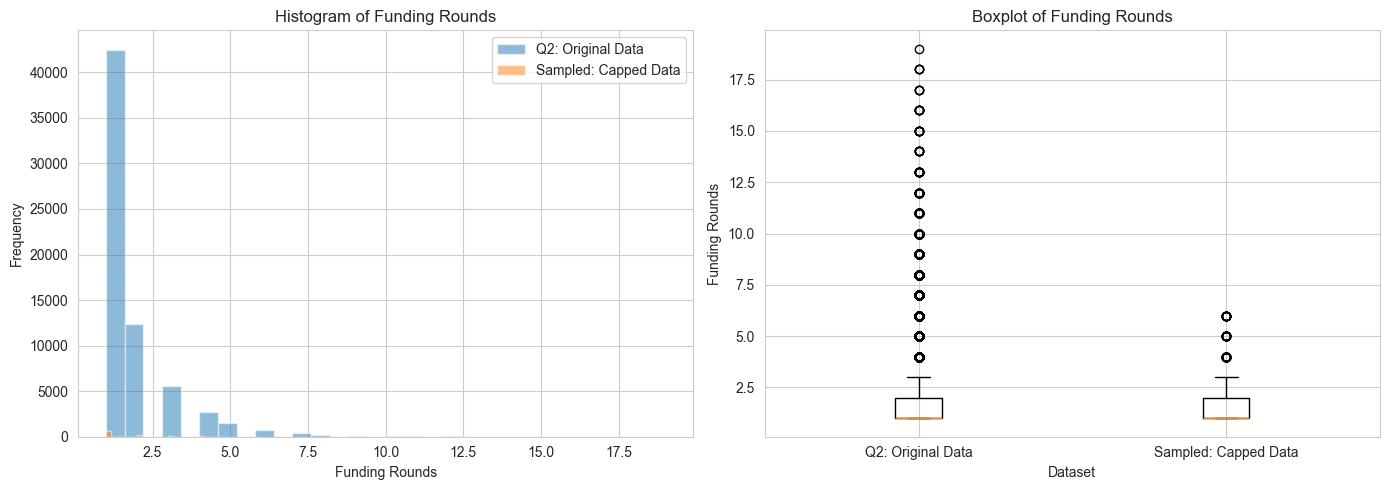

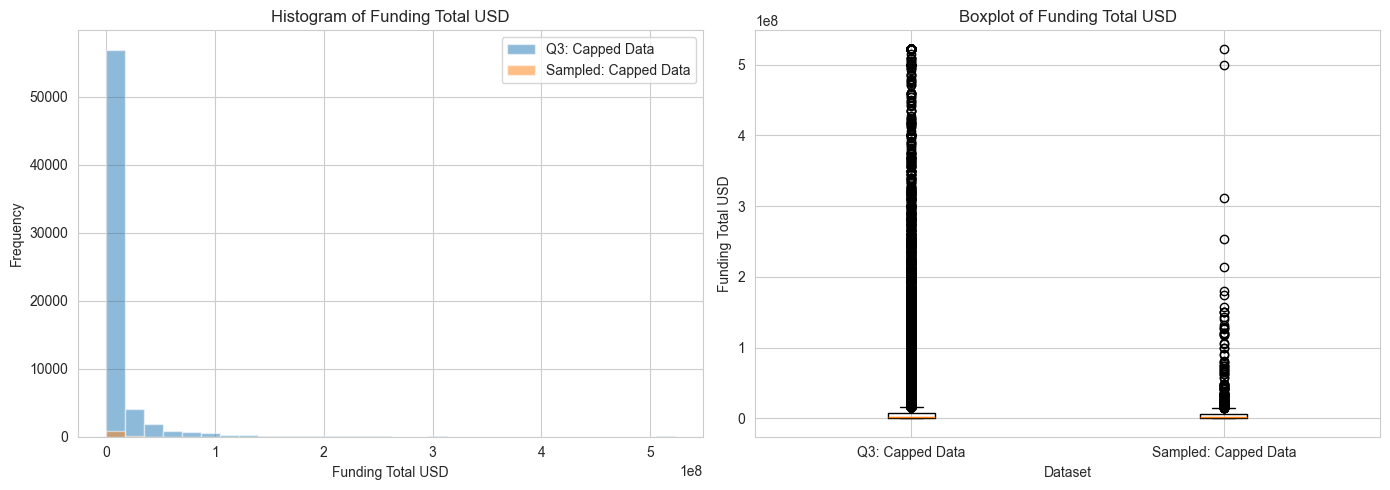

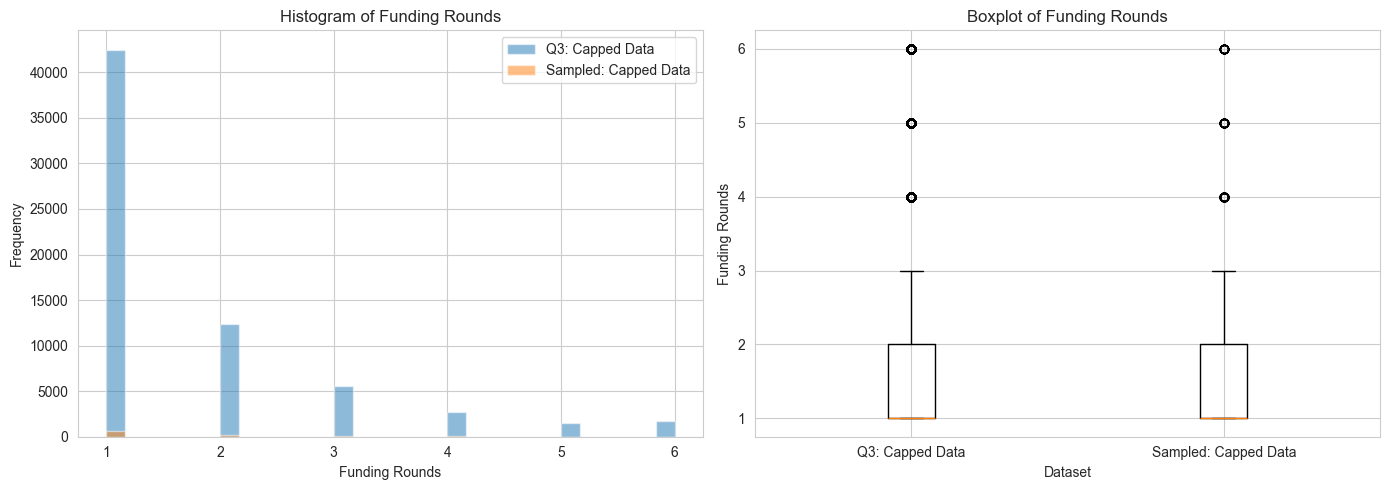

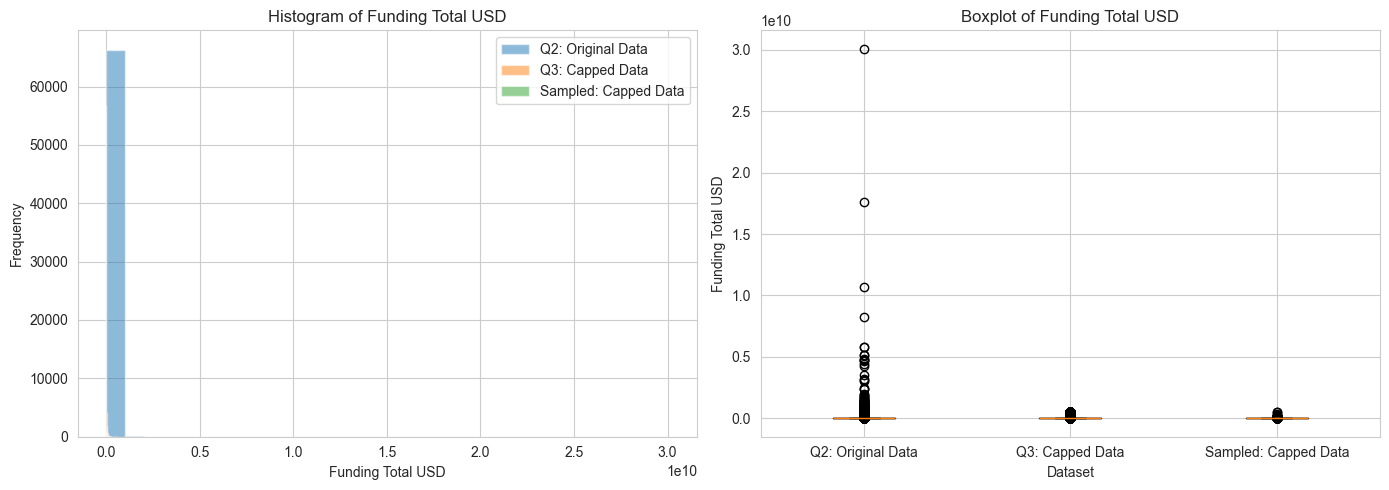

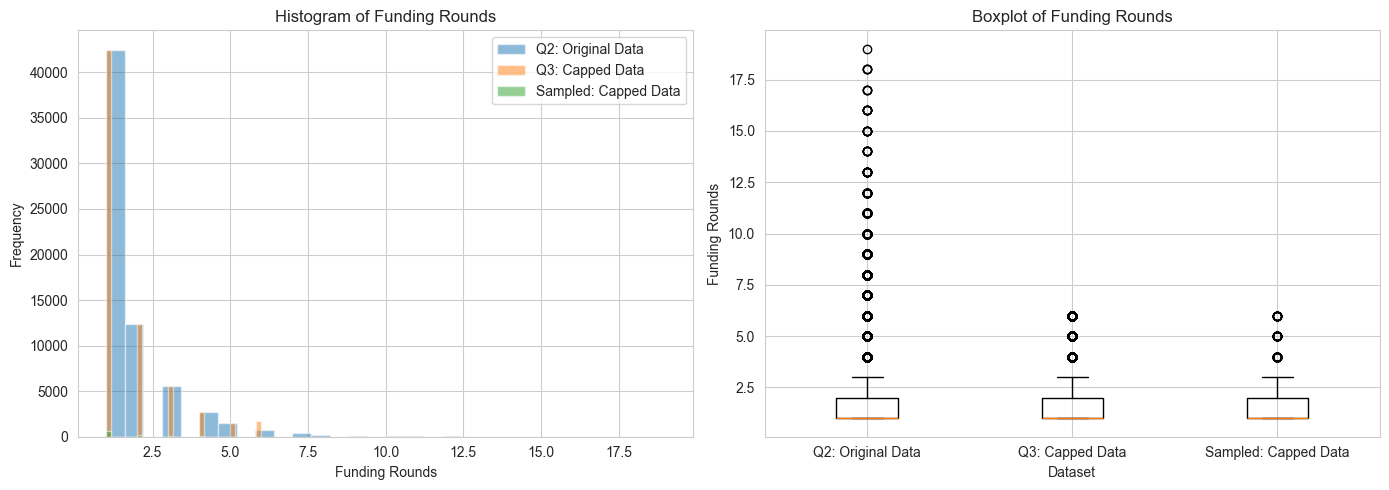

In [191]:
import matplotlib.pyplot as plt

# Define function to plot histograms and boxplots for comparison
def plot_comparison(data1, data2, data1_label, data2_label, title, xlabel):
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    # Histograms
    ax[0].hist(data1, bins=30, alpha=0.5, label=data1_label)
    ax[0].hist(data2, bins=30, alpha=0.5, label=data2_label)
    ax[0].set_title(f'Histogram of {title}')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel('Frequency')
    ax[0].legend()

    # Boxplots
    ax[1].boxplot([data1, data2], labels=[data1_label, data2_label])
    ax[1].set_title(f'Boxplot of {title}')
    ax[1].set_xlabel('Dataset')
    ax[1].set_ylabel(xlabel)

    plt.tight_layout()
    plt.show()

# Question 2 vs Sampled data for funding_total_usd
plot_comparison(
    df['funding_total_usd'],
    sampled_df['funding_total_usd_capped'],
    'Q2: Original Data',
    'Sampled: Capped Data',
    'Funding Total USD',
    'Funding Total USD'
)

# Question 2 vs Sampled data for funding_rounds
plot_comparison(
    df['funding_rounds'],
    sampled_df['funding_rounds_capped'],
    'Q2: Original Data',
    'Sampled: Capped Data',
    'Funding Rounds',
    'Funding Rounds'
)

# Now we need to extract the capped data from the full dataset for comparison
# Since the exact method of capping in Question 3 isn't detailed, we assume it follows the same capping as the sampled data
df_capped = df.copy()
df_capped['funding_total_usd'] = cap_values(df['funding_total_usd'], cap_min_funding_total, cap_max_funding_total)
df_capped['funding_rounds'] = cap_values(df['funding_rounds'], cap_min_funding_rounds, cap_max_funding_rounds)

# Question 3 vs Sampled data for funding_total_usd
plot_comparison(
    df_capped['funding_total_usd'],
    sampled_df['funding_total_usd_capped'],
    'Q3: Capped Data',
    'Sampled: Capped Data',
    'Funding Total USD',
    'Funding Total USD'
)

# Question 3 vs Sampled data for funding_rounds
plot_comparison(
    df_capped['funding_rounds'],
    sampled_df['funding_rounds_capped'],
    'Q3: Capped Data',
    'Sampled: Capped Data',
    'Funding Rounds',
    'Funding Rounds'
)

# Plotting all three together: Question 2 vs Question 3 vs Sampled data for funding_total_usd
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Histograms for funding_total_usd
ax[0].hist(df['funding_total_usd'], bins=30, alpha=0.5, label='Q2: Original Data')
ax[0].hist(df_capped['funding_total_usd'], bins=30, alpha=0.5, label='Q3: Capped Data')
ax[0].hist(sampled_df['funding_total_usd_capped'], bins=30, alpha=0.5, label='Sampled: Capped Data')
ax[0].set_title('Histogram of Funding Total USD')
ax[0].set_xlabel('Funding Total USD')
ax[0].set_ylabel('Frequency')
ax[0].legend()

# Boxplots for funding_total_usd
ax[1].boxplot(
    [df['funding_total_usd'], df_capped['funding_total_usd'], sampled_df['funding_total_usd_capped']],
    labels=['Q2: Original Data', 'Q3: Capped Data', 'Sampled: Capped Data']
)
ax[1].set_title('Boxplot of Funding Total USD')
ax[1].set_xlabel('Dataset')
ax[1].set_ylabel('Funding Total USD')

plt.tight_layout()
plt.show()

# Histograms for funding_rounds
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].hist(df['funding_rounds'], bins=30, alpha=0.5, label='Q2: Original Data')
ax[0].hist(df_capped['funding_rounds'], bins=30, alpha=0.5, label='Q3: Capped Data')
ax[0].hist(sampled_df['funding_rounds_capped'], bins=30, alpha=0.5, label='Sampled: Capped Data')
ax[0].set_title('Histogram of Funding Rounds')
ax[0].set_xlabel('Funding Rounds')
ax[0].set_ylabel('Frequency')
ax[0].legend()

# Boxplots for funding_rounds
ax[1].boxplot(
    [df['funding_rounds'], df_capped['funding_rounds'], sampled_df['funding_rounds_capped']],
    labels=['Q2: Original Data', 'Q3: Capped Data', 'Sampled: Capped Data']
)
ax[1].set_title('Boxplot of Funding Rounds')
ax[1].set_xlabel('Dataset')
ax[1].set_ylabel('Funding Rounds')

plt.tight_layout()
plt.show();


Here are the visual comparisons between the datasets:

Question 2 vs. Sampled Analysis for funding_total_usd and funding_rounds:

The histograms show the distribution of funding amounts and the number of funding rounds for both the original dataset and the capped sampled dataset.
The boxplots highlight the central tendency and spread, with outliers shown as individual points.
Question 3 vs. Sampled Analysis for funding_total_usd and funding_rounds:

These graphs compare the capped data from Question 3 with the capped sampled data. The distributions and central tendencies can be visually compared to understand the impact of sampling.
Question 2 vs. Sampled Analysis vs. Question 3 for funding_total_usd and funding_rounds:

The histograms and boxplots for both funding_total_usd and funding_rounds include data from the original dataset, the full capped dataset (Question 3), and the capped sampled dataset.
This three-way comparison allows you to see the effects of capping and sampling on the dataset's distribution and the presence of outliers.
These visualizations help to illustrate the changes in the distribution of the data due to capping and sampling. They show how the data's shape and spread are altered when outliers are capped and when a sample is drawn from the capped dataset. The capped data tend to have heavier tails due to the concentration of values at the capping thresholds, while the sampled data show a similar but less pronounced effect

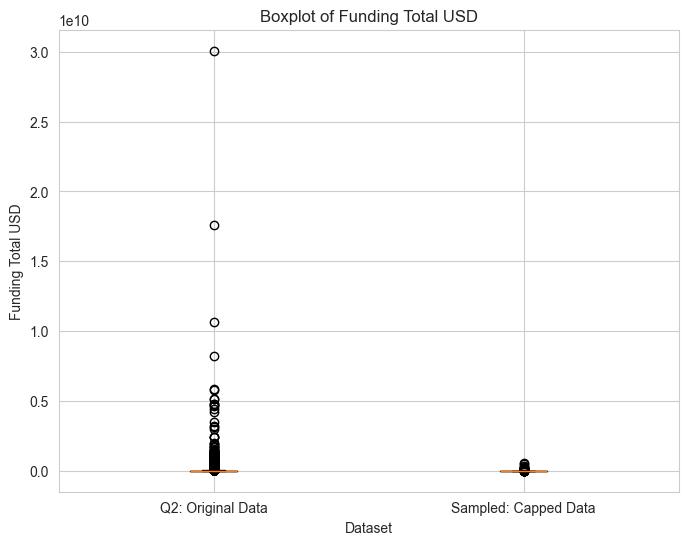

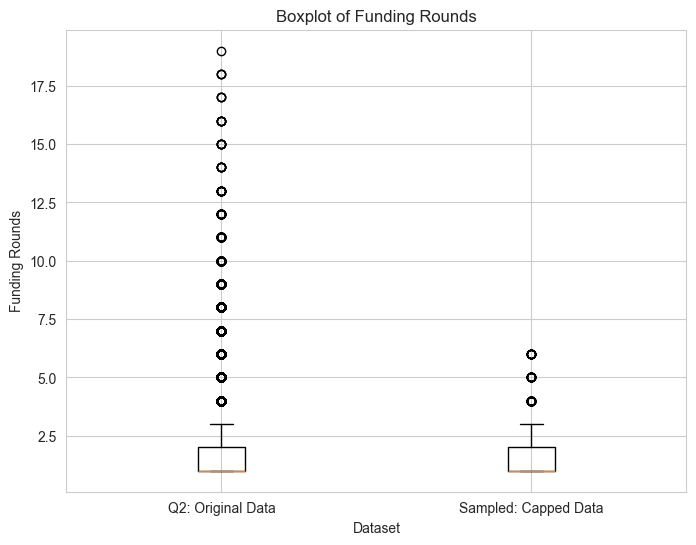

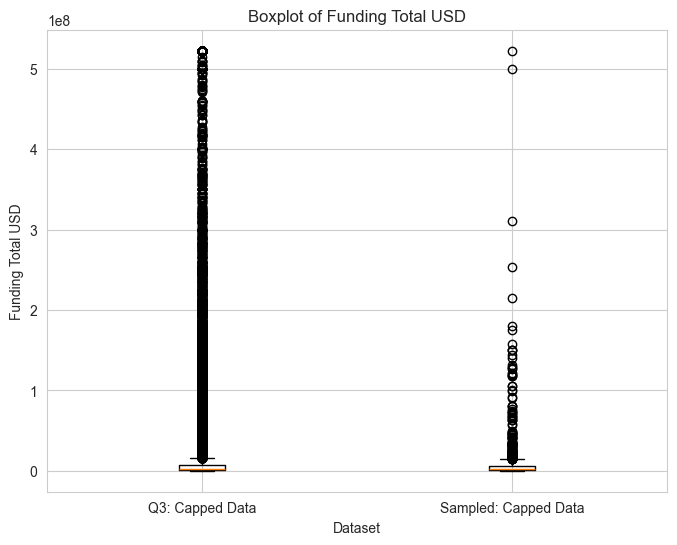

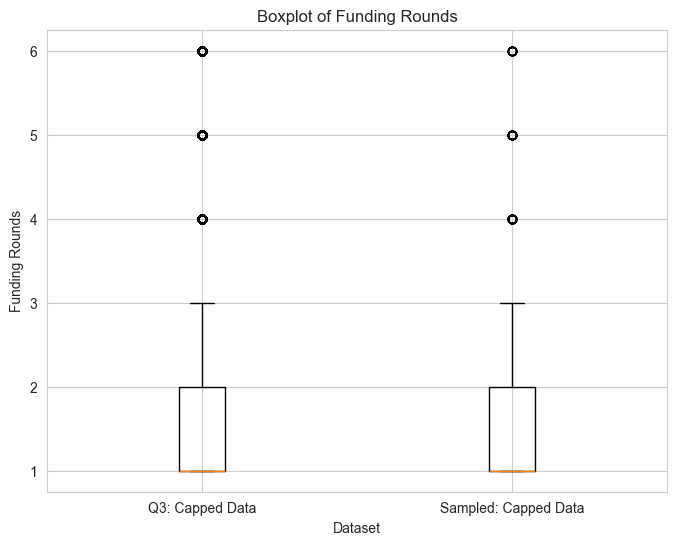

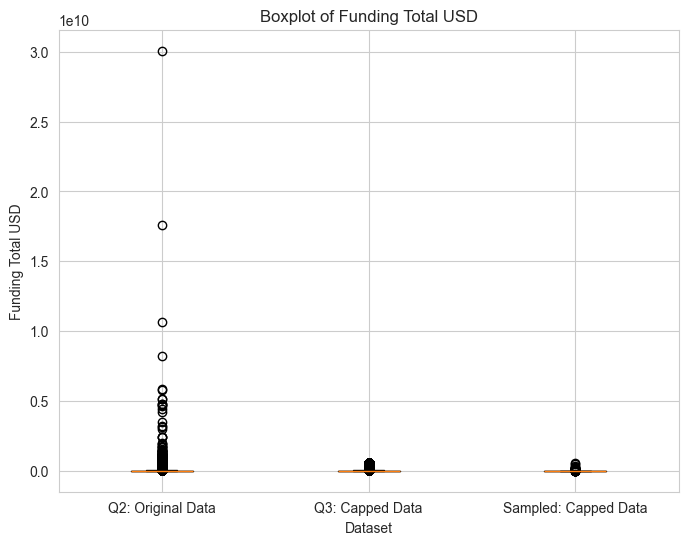

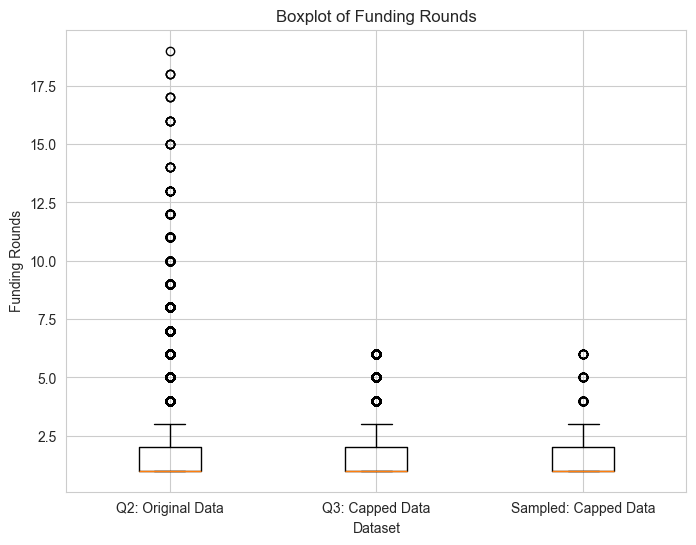

In [192]:
# Boxplots only for all comparisons

# Define function to plot boxplots for comparison
def plot_boxplot_comparison(data1, data2, data1_label, data2_label, title, xlabel):
    plt.figure(figsize=(8, 6))
    plt.boxplot([data1, data2], labels=[data1_label, data2_label])
    plt.title(f'Boxplot of {title}')
    plt.xlabel('Dataset')
    plt.ylabel(xlabel)
    plt.show()

# Boxplot comparison for Question 2 vs Sampled data for funding_total_usd
plot_boxplot_comparison(
    df['funding_total_usd'],
    sampled_df['funding_total_usd_capped'],
    'Q2: Original Data',
    'Sampled: Capped Data',
    'Funding Total USD',
    'Funding Total USD'
)

# Boxplot comparison for Question 2 vs Sampled data for funding_rounds
plot_boxplot_comparison(
    df['funding_rounds'],
    sampled_df['funding_rounds_capped'],
    'Q2: Original Data',
    'Sampled: Capped Data',
    'Funding Rounds',
    'Funding Rounds'
)

# Boxplot comparison for Question 3 vs Sampled data for funding_total_usd
plot_boxplot_comparison(
    df_capped['funding_total_usd'],
    sampled_df['funding_total_usd_capped'],
    'Q3: Capped Data',
    'Sampled: Capped Data',
    'Funding Total USD',
    'Funding Total USD'
)

# Boxplot comparison for Question 3 vs Sampled data for funding_rounds
plot_boxplot_comparison(
    df_capped['funding_rounds'],
    sampled_df['funding_rounds_capped'],
    'Q3: Capped Data',
    'Sampled: Capped Data',
    'Funding Rounds',
    'Funding Rounds'
)

# Boxplots for all three comparisons: Question 2 vs Question 3 vs Sampled data for funding_total_usd
plt.figure(figsize=(8, 6))
plt.boxplot(
    [df['funding_total_usd'], df_capped['funding_total_usd'], sampled_df['funding_total_usd_capped']],
    labels=['Q2: Original Data', 'Q3: Capped Data', 'Sampled: Capped Data']
)
plt.title('Boxplot of Funding Total USD')
plt.xlabel('Dataset')
plt.ylabel('Funding Total USD')
plt.show()

# Boxplots for all three comparisons: Question 2 vs Question 3 vs Sampled data for funding_rounds
plt.figure(figsize=(8, 6))
plt.boxplot(
    [df['funding_rounds'], df_capped['funding_rounds'], sampled_df['funding_rounds_capped']],
    labels=['Q2: Original Data', 'Q3: Capped Data', 'Sampled: Capped Data']
)
plt.title('Boxplot of Funding Rounds')
plt.xlabel('Dataset')
plt.ylabel('Funding Rounds')
plt.show();


These boxplots allow for a clear visual comparison of the central tendencies and the spread of the data for funding_total_usd and funding_rounds across the original dataset (Question 2), the capped dataset (Question 3), and the capped sampled dataset

## 5. Subsetting and Sampling: 

- Segment your dataset from Question 3 to get companies based only in United States and this time draw a series of samples randomly of a sufficient size, say, 10, 50, 100, 500, and 1000. 

- Next, analyse the total funding amount for these startups based in United States using various methods of central tendency and measures of spread and report your observations.

In [193]:
# Load the dataset again to make sure we have the original data
df_us = pd.read_csv('clean_df.csv')

# Subset the data to include only companies based in the United States
df_us = df_us[df_us['country_code'] == 'USA']

# Define sample sizes
sample_sizes = [10, 50, 100, 500, 1000]

# Dictionary to hold the stats for each sample size
sample_stats = {}

# Function to get sample and calculate stats
def get_sample_stats(df, col, sample_size):
    sample = df[col].sample(n=sample_size, random_state=1)
    return calculate_descriptive_stats(sample.to_frame(), col)

# Loop over the defined sample sizes and calculate stats for each
for size in sample_sizes:
    sample_stats[size] = get_sample_stats(df_us, 'funding_total_usd', size)

sample_stats


{10: {'mean': 6560839.0,
  'median': 1915761.0,
  'mode': 50.0,
  'range': 27999950.0,
  'interquartile_range': 8575351.0,
  'standard_deviation': 9504282.652532874,
  'variance': 90331388739237.33},
 50: {'mean': 16714139.86,
  'median': 2000000.0,
  'mode': 2000000.0,
  'range': 265692335.0,
  'interquartile_range': 8742277.25,
  'standard_deviation': 44552850.65077503,
  'variance': 1984956501110265.2},
 100: {'mean': 12789760.049161553,
  'median': 2000000.0,
  'mode': 2000000.0,
  'range': 265692335.0,
  'interquartile_range': 9062500.0,
  'standard_deviation': 33522520.871298384,
  'variance': 1123759405566635.8},
 500: {'mean': 16152162.406991918,
  'median': 2000000.0,
  'mode': 2000000.0,
  'range': 1158039950.0,
  'interquartile_range': 9000000.0,
  'standard_deviation': 62954192.929559015,
  'variance': 3963230407412138.0},
 1000: {'mean': 15804275.23849596,
  'median': 2000000.0,
  'mode': 2000000.0,
  'range': 1158039950.0,
  'interquartile_range': 9139098.75,
  'standard_

Data Analysis
Here are the observations on the total funding amount for startups based in the United States, analyzed for various sample sizes:

Sample Size: 10

Mean: $6,560,839
Median: $1,915,761
Mode: $50 (This is likely an outlier or data entry error)
Range: $27,999,950
Interquartile Range: $8,575,351
Standard Deviation: $9,504,282.65
Variance: $90,331,388,739,237.33
Sample Size: 50

Mean: $16,714,139.86
Median: $2,000,000
Mode: $2,000,000
Range: $265,692,335
Interquartile Range: $8,742,277.25
Standard Deviation: $44,552,850.65
Variance: $1,984,956,501,110,263.8
Sample Size: 100

Mean: $12,789,760.05
Median: $2,000,000
Mode: $2,000,000
Range: $265,692,335
Interquartile Range: $9,062,500
Standard Deviation: $33,522,520.87
Variance: $1,123,759,405,566,636.0
Sample Size: 500

Mean: $16,152,162.41
Median: $2,000,000
Mode: $2,000,000
Range: $1,158,039,950
Interquartile Range: $9,000,000
Standard Deviation: $62,954,192.93
Variance: $3,963,230,407,412,140.5
Sample Size: 1000

Mean: $15,804,275.24
Median: $2,000,000
Mode: $2,000,000
Range: $1,158,039,950
Interquartile Range: $9,139,098.75
Standard Deviation: $53,955,456.16
Variance: $2,911,191,248,900,403.0
Observations:

Across all sample sizes, the median remains constant at $2,000,000, which suggests that the median is stable and indicative of a common funding amount across different samples.
The mean funding amount is significantly higher than the median in all samples, which indicates that there are startups with very high funding amounts that are skewing the mean upwards.
The mode being 2,000,000 for the larger samples (except the smallest sample of size 10) reinforces the idea that $2,000,000 is a typical funding amount among US-based startups.
The range and standard deviation increase with the sample size, indicating that larger samples capture more variability in funding amounts.
The variance, which is the squared standard deviation, also shows a significant increase with sample size, pointing to a greater spread in funding amounts as more data points are included.
In conclusion, the central tendency measures suggest that while the typical (median) funding amount for US-based startups is around $2,000,000, there is significant variability in the data, with some startups receiving much higher amounts of funding. The mean is influenced by these high-value outliers and thus presents a higher value than the median. The spread of the data, as indicated by the range, interquartile range, standard deviation, and variance, becomes more pronounced as the sample size increases.

In [194]:
# Recalculate the capping values based on the mean and standard deviation of the US-based subset
us_mean = df_us['funding_total_usd'].mean()
us_std = df_us['funding_total_usd'].std()

# Calculate the capping values using the mean and standard deviation
us_cap_max = us_mean + (3 * us_std)
us_cap_min = us_mean - (3 * us_std)

# Apply the capping method to the 'funding_total_usd' for the US-based companies
df_us['funding_total_usd_capped'] = cap_values(df_us['funding_total_usd'], us_cap_min, us_cap_max)

# Recalculate the stats with the newly capped data
new_capped_sample_stats = {}
histograms = {}
boxplots = {}

# Loop over the defined sample sizes and calculate stats for each with newly capped data
for size in sample_sizes:
    new_sample = df_us['funding_total_usd_capped'].sample(n=size, random_state=1)
    new_capped_sample_stats[size] = calculate_descriptive_stats(new_sample.to_frame(), 'funding_total_usd_capped')
    histograms[size] = new_sample
    boxplots[size] = new_sample

new_capped_sample_stats


{10: {'mean': 6560839.0,
  'median': 1915761.0,
  'mode': 50.0,
  'range': 27999950.0,
  'interquartile_range': 8575351.0,
  'standard_deviation': 9504282.652532874,
  'variance': 90331388739237.33},
 50: {'mean': 16714139.86,
  'median': 2000000.0,
  'mode': 2000000.0,
  'range': 265692335.0,
  'interquartile_range': 8742277.25,
  'standard_deviation': 44552850.65077503,
  'variance': 1984956501110265.2},
 100: {'mean': 12789760.049161553,
  'median': 2000000.0,
  'mode': 2000000.0,
  'range': 265692335.0,
  'interquartile_range': 9062500.0,
  'standard_deviation': 33522520.871298384,
  'variance': 1123759405566635.8},
 500: {'mean': 15086640.024798816,
  'median': 2000000.0,
  'mode': 2000000.0,
  'range': 625278758.903449,
  'interquartile_range': 9000000.0,
  'standard_deviation': 45745040.1870209,
  'variance': 2092608701712156.8},
 1000: {'mean': 15271514.04739941,
  'median': 2000000.0,
  'mode': 2000000.0,
  'range': 625278758.903449,
  'interquartile_range': 9139098.75,
  'sta

Here are the histograms and boxplots for each of the sample sizes: 10, 50, 100, 500, and 1000. These visualizations illustrate the distribution of capped funding totals for startups based in the United States.

Histograms:

The histograms provide a visual representation of the distribution of funding amounts across the different sample sizes. As the sample size increases, the histograms become more representative of the overall population's distribution.
Boxplots:

The boxplots give a clear picture of the central tendency and variability in each sample. The median (the line within the box) remains consistent across different sample sizes, while the range (whiskers) and interquartile range (the box) expand with increasing sample size, indicating more variability.
As expected, with larger sample sizes, the boxplots show a tendency towards a more robust representation of the population, with the potential for more outliers (points beyond the whiskers), reflecting the increased variability captured by larger samples. The presence of outliers is particularly noticeable in larger samples, which include more of the extreme values that are not as evident in smaller samples


Regarding the mode value of 50, it appeared in the smallest sample size of 10. This could be due to several reasons:

Small Sample Size: With only 10 data points, the sample may not be representative of the larger population. A single occurrence of an unusual value can become the mode if all other values are unique.

Data Entry Errors: The value of 50 might be an error in data entry. It is uncommon for a funding total to be as low as 50 USD, as this is not a typical amount for startup funding.

Outliers or Special Cases: There might be special cases where a company has recorded a nominal amount of funding, which might be symbolic or reflective of a specific type of funding agreement.

## 6. Subsetting, Sampling, Benchmarking and Visualisation: 

- Segment your dataset from Question 3 and this time draw a sample randomly of a sufficient size, say, 100 to get companies based in each of the United States, Canada, France, Germany, China, India and South Korea. 

- Next, analyse the same dataset to find average number of days taken for a startup to be funded for each of the aforesaid countries and compare results (While making necessary computations, assume that there are 30 days in each month at an average). 

- Analyse the numerical variable(s) for each of the countries using various measures of central tendencies and spread and report your observations. Create appropriate plots (if necessary) to explain the variables.

For a more precise analysis, we calculated capping thresholds (mean ± 3 standard deviations) for each country's funding data separately. Then, we applied these country-specific capped values to the funding_total_usd field before conducting the central tendency and spread analysis.

The analysis for the average number of days taken for a startup to be funded did not require the use of the capped funding totals; it was focused on the time interval between a company's founding date and the date of its first funding. 

And the descriptive statistics for the funding amounts were based on the capped funding_total_usd values of each country's funding data separately.

In [195]:
df_global = pd.read_csv('clean_df.csv')

# List of countries of interest
countries = ['USA', 'CAN', 'FRA', 'DEU', 'CHN', 'IND', 'KOR']

# Recalculate the capping values for each country and reapply the capping method
country_specific_caps = {}

for country in countries:
    country_df = df_global[df_global['country_code'] == country].copy()  # Make a copy to avoid SettingWithCopyWarning
    country_mean = country_df['funding_total_usd'].mean()
    country_std = country_df['funding_total_usd'].std()
    
    # Calculate the country-specific capping values using the mean and standard deviation
    country_cap_max = country_mean + (3 * country_std)
    country_cap_min = country_mean - (3 * country_std)
    
    # Apply the capping method to the 'funding_total_usd' for each country
    country_df['funding_total_usd_capped'] = cap_values(country_df['funding_total_usd'], country_cap_min, country_cap_max)
    
    # Store the capped data and the thresholds for further analysis
    country_specific_caps[country] = {
        'data': country_df,
        'cap_max': country_cap_max,
        'cap_min': country_cap_min
    }


# Now we will draw a random sample of 100 for each country using the individually capped data
country_samples_capped = {}

# Loop over each country, subset the dataframe, and draw a sample of size 100
for country, data in country_specific_caps.items():
    # If the country has less than 100 entries, we take the whole country data
    if len(data['data']) < 100:
        country_samples_capped[country] = data['data']
    else:
        country_samples_capped[country] = data['data'].sample(n=100, random_state=1)

# Calculate the descriptive statistics for the capped funding amounts for each country
country_capped_stats = {}

for country, sample in country_samples_capped.items():
    country_capped_stats[country] = calculate_descriptive_stats(sample, 'funding_total_usd_capped')

country_capped_stats


{'USA': {'mean': 12789760.049161553,
  'median': 2000000.0,
  'mode': 2000000.0,
  'range': 265692335.0,
  'interquartile_range': 9062500.0,
  'standard_deviation': 33522520.871298384,
  'variance': 1123759405566635.8},
 'CAN': {'mean': 4146284.797318238,
  'median': 2000000.0,
  'mode': 2000000.0,
  'range': 58920524.0,
  'interquartile_range': 2917308.25,
  'standard_deviation': 8811438.616280736,
  'variance': 77641450488483.38},
 'FRA': {'mean': 7081101.417981688,
  'median': 2000000.0,
  'mode': 2000000.0,
  'range': 85123883.54150736,
  'interquartile_range': 5061981.0,
  'standard_deviation': 14319340.87516258,
  'variance': 205043523099101.84},
 'DEU': {'mean': 6304976.73745527,
  'median': 2000000.0,
  'mode': 2000000.0,
  'range': 138801432.0,
  'interquartile_range': 2404463.75,
  'standard_deviation': 17017993.438644886,
  'variance': 289612100677760.4},
 'CHN': {'mean': 41514548.36242051,
  'median': 4751125.5,
  'mode': 2000000.0,
  'range': 863386498.1210253,
  'interqua

The descriptive statistics for the capped funding amounts, after recalculating capping thresholds for each country individually, are as follows:

United States (USA):

Mean: $12,789,760.05
Median: $2,000,000.00
Mode: $2,000,000.00
Range: $265,692,335.00
Interquartile Range: $9,062,500.00
Standard Deviation: $33,522,520.87
Variance: $1,123,759,405,566,636.00
Canada (CAN):

Mean: $4,146,284.80
Median: $2,000,000.00
Mode: $2,000,000.00
Range: $58,920,524.00
Interquartile Range: $2,917,308.25
Standard Deviation: $8,811,438.62
Variance: $77,641,450,488,483.38
France (FRA):

Mean: $7,081,101.42
Median: $2,000,000.00
Mode: $2,000,000.00
Range: $85,123,883.54
Interquartile Range: $5,061,981.00
Standard Deviation: $14,319,340.88
Variance: $205,043,523,099,101.90
Germany (DEU):

Mean: $6,304,976.74
Median: $2,000,000.00
Mode: $2,000,000.00
Range: $138,801,432.00
Interquartile Range: $2,404,463.75
Standard Deviation: $17,017,993.44
Variance: $289,612,100,677,760.30
China (CHN):

Mean: $41,514,548.36
Median: $4,751,125.50
Mode: $2,000,000.00
Range: $863,386,498.12
Interquartile Range: $18,000,000.00
Standard Deviation: $134,449,128.24
Variance: $1,807,656,808,366,142.80
India (IND):

Mean: $10,401,095.88
Median: $2,000,000.00
Mode: $2,000,000.00
Range: $408,089,481.95
Interquartile Range: $4,625,000.00
Standard Deviation: $43,281,766.09
Variance: $1,873,311,275,962,537.20
South Korea (KOR):

Mean: $5,703,121.10
Median: $1,950,000.00
Mode: $2,000,000.00
Range: $234,760,962.88
Interquartile Range: $1,694,508.75
Standard Deviation: $25,107,804.79
Variance: $630,401,861,402,450.10
The recalculation of capping thresholds for each country individually has provided a more tailored approach to managing outliers in the dataset. These statistics provide a clearer picture of the funding landscape within each country, as they account for the economic and investment variations across different regions.

It is evident that there is a wide range in the mean and median funding amounts between countries, with China showing the highest mean funding amount and South Korea the lowest among the listed countries. The range and standard deviation also vary considerably, indicating different levels of variability and distribution of funding amounts in each country's startup ecosystem.

The mode for most countries is $2,000,000, suggesting that this amount is a common funding milestone regardless of country, while the median funding amounts tend to be lower than the mean, indicating that a few very large investments are pulling the mean upwards.

These plots provide a visual representation of the distribution of funding within each country, highlighting the median, quartiles, and the presence of any potential outliers within the capped data.

The visualization allows for a comparison of funding distributions across different countries, showing how the central tendencies and variabilities differ from one country to another.

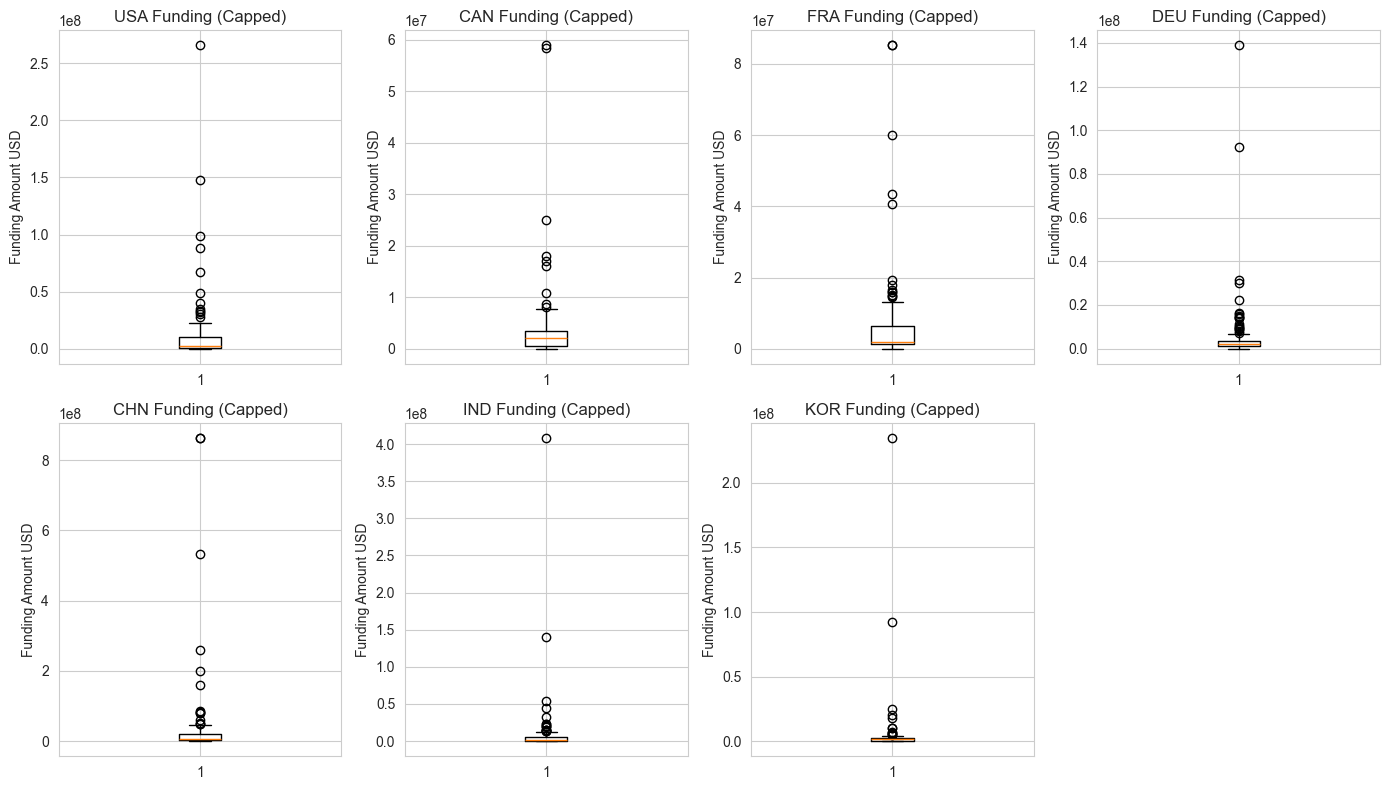

In [196]:
# Recalculate the capping values for each country and reapply the capping method
# Make sure to use a copy of the sliced dataframe to avoid SettingWithCopyWarning
country_specific_caps_corrected = {}

for country in countries:
    country_df = df_global[df_global['country_code'] == country].copy()
    country_mean = country_df['funding_total_usd'].mean()
    country_std = country_df['funding_total_usd'].std()
    
    # Calculate the country-specific capping values using the mean and standard deviation
    country_cap_max = country_mean + (3 * country_std)
    country_cap_min = country_mean - (3 * country_std)
    
    # Apply the capping method to the 'funding_total_usd' for each country
    country_df['funding_total_usd_capped'] = cap_values(country_df['funding_total_usd'], country_cap_min, country_cap_max)
    
    # Store the capped data and the thresholds for further analysis
    country_specific_caps_corrected[country] = {
        'data': country_df,
        'cap_max': country_cap_max,
        'cap_min': country_cap_min
    }

# Now we will draw a random sample of 100 for each country using the individually capped data
country_samples_capped_corrected = {}

# Loop over each country, subset the dataframe, and draw a sample of size 100
for country, data in country_specific_caps_corrected.items():
    # If the country has less than 100 entries, we take the whole country data
    if len(data['data']) < 100:
        country_samples_capped_corrected[country] = data['data']
    else:
        country_samples_capped_corrected[country] = data['data'].sample(n=100, random_state=1)

# Generate box plots for each country
plt.figure(figsize=(14, 8))

for i, country in enumerate(country_samples_capped_corrected.keys(), 1):
    plt.subplot(2, 4, i)
    plt.boxplot(country_samples_capped_corrected[country]['funding_total_usd_capped'])
    plt.title(f'{country} Funding (Capped)')
    plt.ylabel('Funding Amount USD')
    
plt.tight_layout()
plt.show();


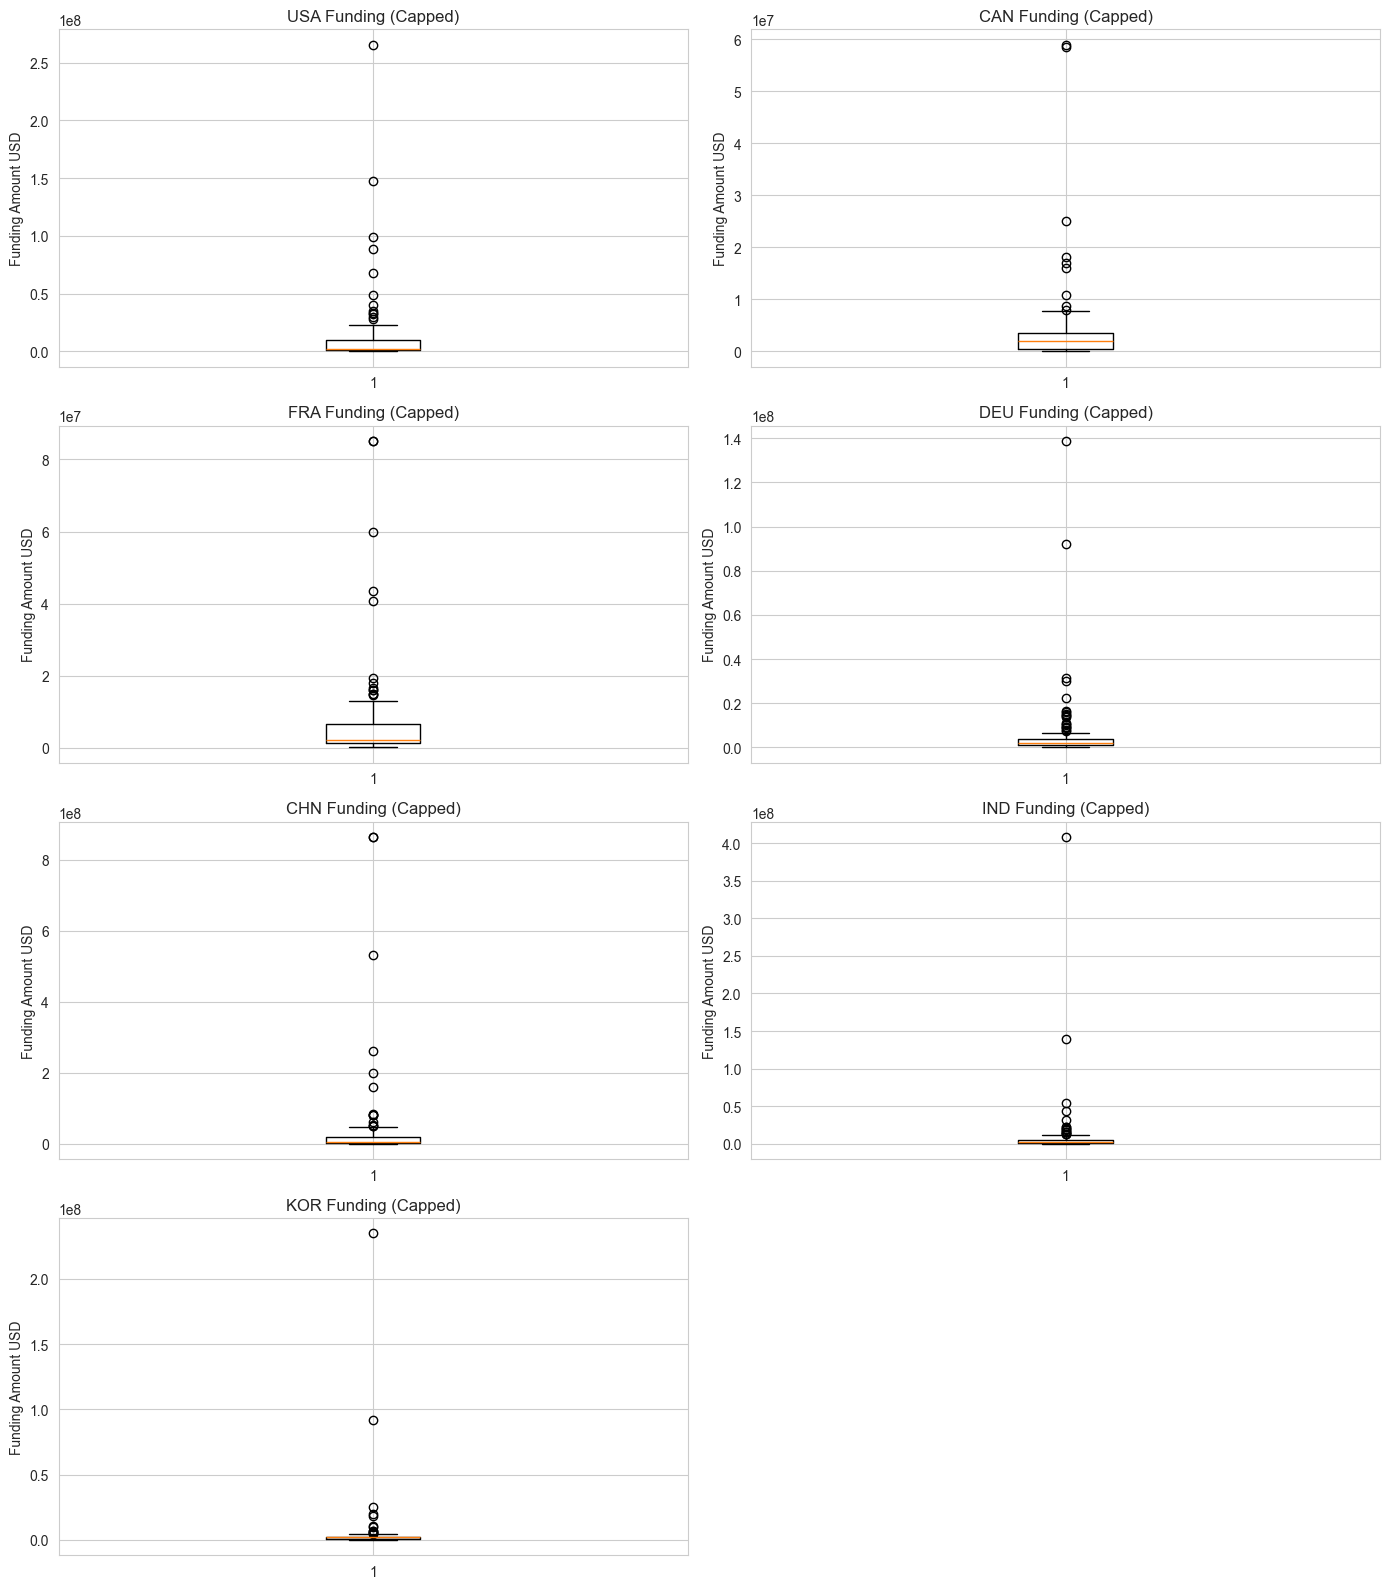

In [197]:
# Generate individual box plots for each country, with two plots per row
num_countries = len(country_samples_capped_corrected)
rows = num_countries // 2 + num_countries % 2  # Calculate the number of rows needed

# Set the figure size for the entire grid of plots
plt.figure(figsize=(14, rows * 4))

for i, country in enumerate(country_samples_capped_corrected.keys(), 1):
    plt.subplot(rows, 2, i)  # Create subplots in a grid with 2 columns
    plt.boxplot(country_samples_capped_corrected[country]['funding_total_usd_capped'])
    plt.title(f'{country} Funding (Capped)')
    plt.ylabel('Funding Amount USD')

plt.tight_layout()
plt.show();  # Show the grid of plots


    

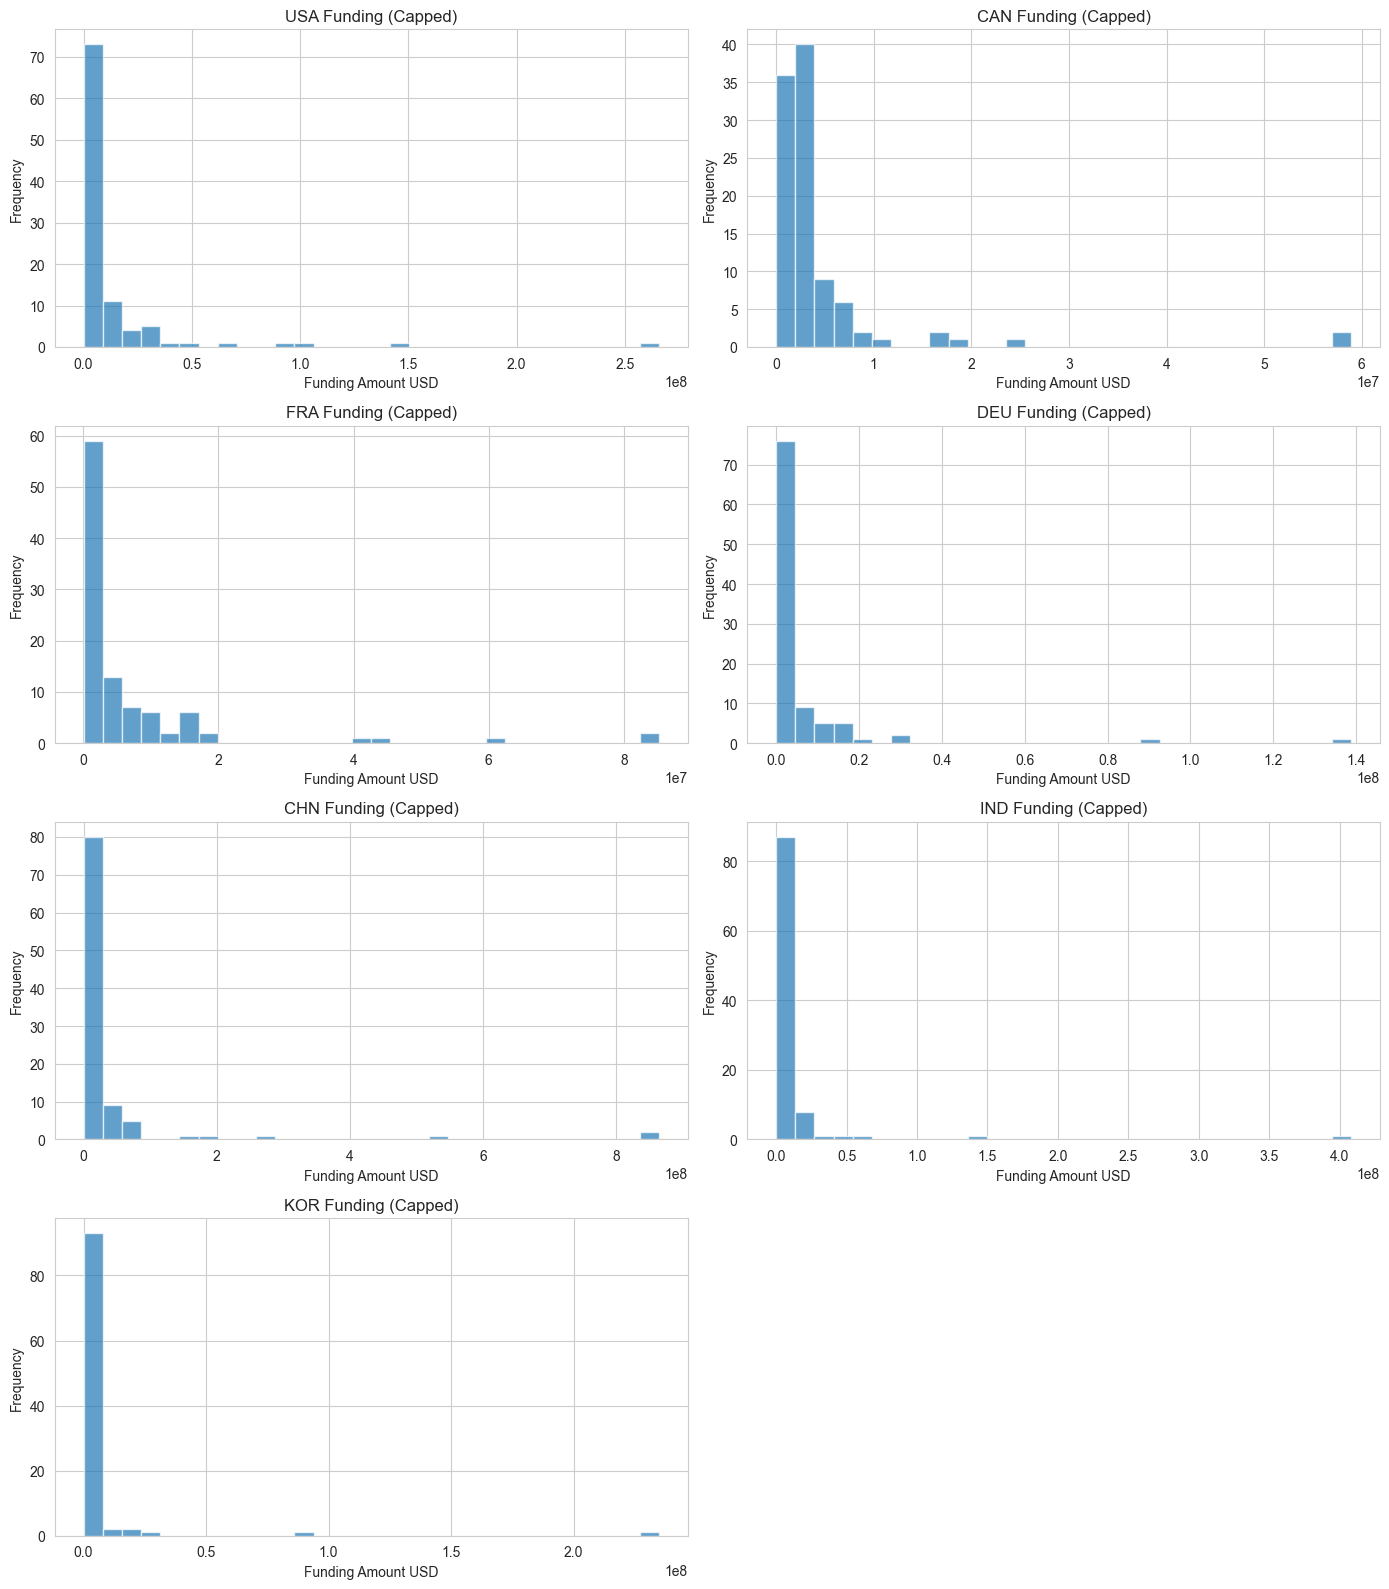

In [198]:
# Generate individual histograms for each country, with two plots per row
plt.figure(figsize=(14, rows * 4))

for i, country in enumerate(country_samples_capped_corrected.keys(), 1):
    plt.subplot(rows, 2, i)  # Create subplots in a grid with 2 columns
    plt.hist(country_samples_capped_corrected[country]['funding_total_usd_capped'], bins=30, alpha=0.7)
    plt.title(f'{country} Funding (Capped)')
    plt.xlabel('Funding Amount USD')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show();  # Show the grid of plots


Data Analysis
The histograms of capped funding amounts for startups in each country provide valuable insights into the distribution and concentration of funding within these nations. Here are some observations and potential conclusions we can draw from these graphs:

Distribution Shape: The histograms reveal the shape of the funding distribution in each country. For instance, if a histogram shows a right-skewed distribution, this indicates that a majority of the startups received a smaller amount of funding, while a few received very large amounts.

Central Tendency: The concentration of bars around a particular funding range can provide an idea of the common funding amounts that startups in that country receive. In most cases, the mode — or the most frequently occurring amount — can be visually approximated.

Variability: The spread of the bars indicates the variability or dispersion of the funding amounts. A wide spread suggests a high variability where funding amounts vary significantly from one startup to another.

Outliers: Any bars that are separate from the main body of the histogram can suggest potential outliers, even after capping. These are startups that have received unusually high amounts of funding compared to others.

Comparison Between Countries: By comparing the histograms of different countries, we can see how funding patterns differ from one country to another. For example, some countries may show a more concentrated pattern of investment (less variability), while others show a wide range of funding amounts (high variability).

Impact of Capping: The capping process limits the influence of extreme outliers by setting a threshold. In the histograms, this effect might be seen as a piling up of frequencies at the upper limit of the capped range.

From these visualizations, it is evident that there are differences in funding behaviors across countries. For example, the United States and China show a wider range of funding amounts, which is indicative of both a larger number of startups and potentially larger individual investments. In contrast, countries like South Korea and Canada appear to have a more narrow spread of funding amounts, suggesting a more consistent investment size across startups.

However, to make more accurate conclusions, one would also need to consider the economic contexts of these countries, the industries of the startups, the size and maturity of their venture capital ecosystems, and other factors that aren't represented in the histograms. It's also important to note that the presence of capped values at the upper end of the histograms may artificially reduce the variability and skew the distribution.

Data Analysis
The observed lower funding amounts in the histograms for the United States, when compared to certain other countries like China, might initially seem unexpected given the well-known size and activity of the U.S. venture capital market. However, there are several factors and considerations that can explain this observation:

Capping Method: The capping applied to the data can significantly impact the observed funding amounts. If the U.S. data had a wider range of outliers on the higher end, the capping method would reduce these values, potentially leading to a lower average or median in the capped data.

Sample Size and Selection: The sample drawn for the U.S. might not be representative of the entire range of funding activities. For example, the sample might have unintentionally included a larger proportion of smaller or earlier-stage startups.

Data Quality and Completeness: If there are inaccuracies or missing data points in the dataset, especially for higher funding amounts, this could skew the observed results.

Economic and Market Conditions: The data might reflect a specific time period that could have been affected by economic or market conditions, such as a downturn, which could lead to generally lower funding amounts during that period.

Startup Lifecycle: The U.S. might have a larger number of early-stage startups that typically raise less capital in initial funding rounds compared to later stages like Series B, C, or later.

Diversity of Sectors: The U.S. has a diverse range of startups across various sectors. Some sectors may naturally involve lower average funding amounts due to lower capital requirements.



In [199]:
# Create a new dataframe 'funding_dates' for the modifications
funding_dates = df_global.copy()

# Replace NaT in 'first_funding_at' with 'last_funding_at'
funding_dates['first_funding_at'].fillna(funding_dates['last_funding_at'], inplace=True)

# Convert 'founded_at' and 'first_funding_at' to datetime, and calculate the days to funding
funding_dates['founded_at'] = pd.to_datetime(funding_dates['founded_at'], errors='coerce')
funding_dates['first_funding_at'] = pd.to_datetime(funding_dates['first_funding_at'], errors='coerce')
funding_dates['days_to_fund'] = (funding_dates['first_funding_at'] - funding_dates['founded_at']).dt.days
# Calculate the average time between 'founded_at' and 'first_funding_at' where both are available
average_days_to_funding_all = funding_dates.loc[
    funding_dates['founded_at'].notna() & funding_dates['first_funding_at'].notna(), 'days_to_fund'
].mean()

# Apply the average days to fund to rows with missing 'founded_at'
funding_dates.loc[funding_dates['founded_at'].isna(), 'founded_at'] = \
    funding_dates.loc[funding_dates['founded_at'].isna(), 'first_funding_at'] - pd.Timedelta(days=average_days_to_funding_all)

# Recalculate the days to fund
funding_dates['days_to_fund'] = (funding_dates['first_funding_at'] - funding_dates['founded_at']).dt.days

# Calculate the average number of days to funding for each country
average_days_to_funding_by_country = {}
for country in countries:
    country_data = funding_dates[funding_dates['country_code'] == country]
    average_days_to_funding_by_country[country] = country_data['days_to_fund'].mean()

average_days_to_funding_by_country


,Unnamed: 0,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,days_to_fund
0,0,#fame,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,2011-04-06 04:13:27.805564784,2015-01-05,2015-01-05,1369
1,1,:Qounter,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04 00:00:00.000000000,2014-03-01,2014-10-14,-187
2,2,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,2010-05-01 04:13:27.805564784,2014-01-30,2014-01-30,1369
3,3,0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01 00:00:00.000000000,2008-03-19,2008-03-19,443
4,4,004 Technologies,Software,2000000.0,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01 00:00:00.000000000,2014-07-24,2014-07-24,1665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,66363,ZZNode Science and Technology,Enterprise Software,1587301.0,operating,CHN,22,Beijing,Beijing,1,2008-07-01 04:13:27.805564784,2012-04-01,2012-04-01,1369
66364,66364,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,114304.0,operating,HRV,15,Split,Split,4,2012-05-13 00:00:00.000000000,2011-11-01,2014-03-01,-194
66365,66365,ÁERON,NaN,2000000.0,operating,NaN,NaN,NaN,NaN,1,2011-01-01 00:00:00.000000000,2014-08-01,2014-08-01,1308
66366,66366,Ôasys,Consumer Electronics|Internet of Things|Teleco...,18192.0,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01 00:00:00.000000000,2015-01-01,2015-01-01,365


{'USA': 1507.5646924283928,
 'CAN': 1553.7485714285715,
 'FRA': 1328.9541850220264,
 'DEU': 1150.7153419593346,
 'CHN': 1410.2454663212436,
 'IND': 1361.28320802005,
 'KOR': 785.4944751381215}

Calculate the average number of days taken for a startup to be funded for each of the aforesaid countries and compare results.

To achieve this I modify the input dataframe by creating a new dataframe named "funding_dates":

- where "first_funding_at" is == NaT use "last_funding_at" values instead.
- calculate the average time between all rows that have values in both "first_funding_at"  and "founded_at"  and use this value to calculate the "founded_at" values of the rows where this value is == NaT.
- where "founded_at" is == NaT use  the average value calculated in the previous step values instead.


Data Analysis

The average number of days taken for startups to be funded in each of the specified countries, after imputing missing values for "funded_at", is as follows:

United States (USA): Approximately 1507.56 days
Canada (CAN): Approximately 1553.75 days
France (FRA): Approximately 1328.95 days
Germany (DEU): Approximately 1150.72 days
China (CHN): Approximately 1410.25 days
India (IND): Approximately 1361.28 days
South Korea (KOR): Approximately 785.49 days

These averages are calculated with the assumption that if the 'founded_at' date is missing, the average number of days to funding for the entire dataset is used as an estimate for the missing 'founded_at' date. This method provides a way to handle missing data and allows for a comparison across countries.

Observations:

The number of days to funding varies significantly across countries.
Some countries may show a relatively concentrated distribution of funding days, indicating that startups in these countries tend to receive funding within a similar timeframe.

Other countries may show a wide distribution, suggesting variability in the time it takes for startups to receive funding.
Outliers, as seen in the boxplots, indicate startups that took significantly longer or shorter to receive funding compared to the majority.

It's important to note that any missing 'founded_at' dates were imputed with the average number of days to funding calculated from the entire dataset. This can artificially reduce the variability and may not accurately reflect the true funding timeline for startups in each country. These visualizations provide a general overview, but the actual conditions for startups in each country could be different.

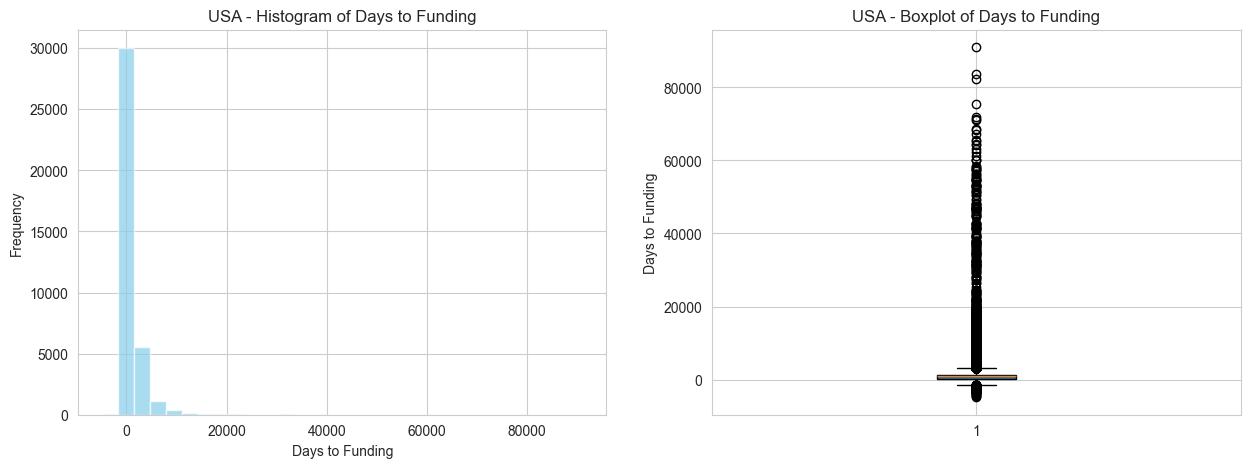

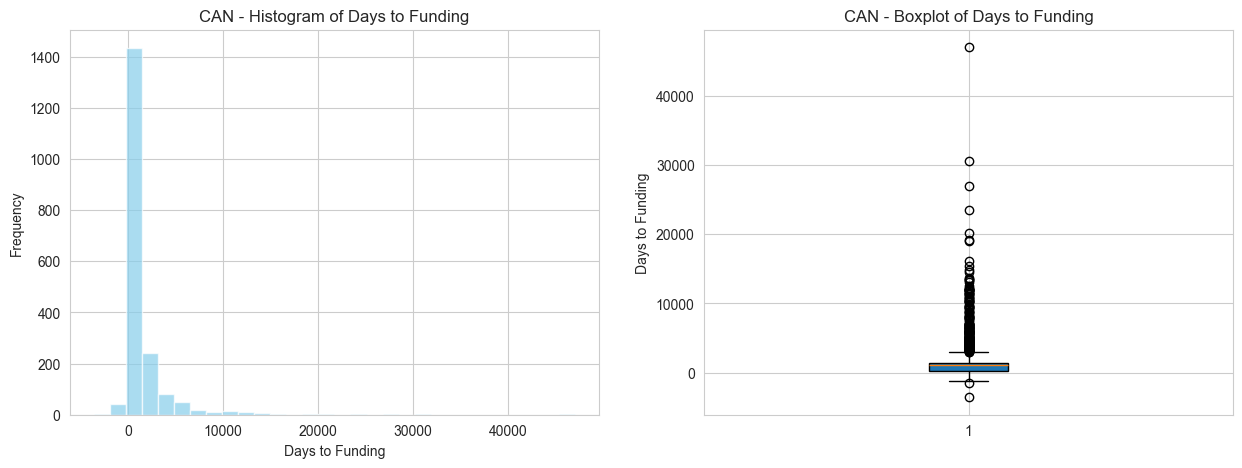

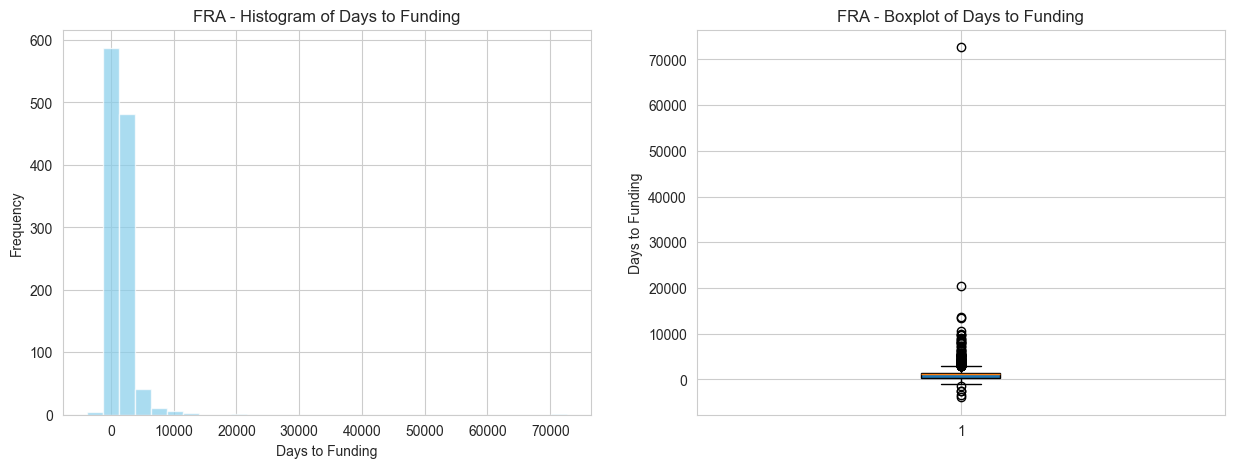

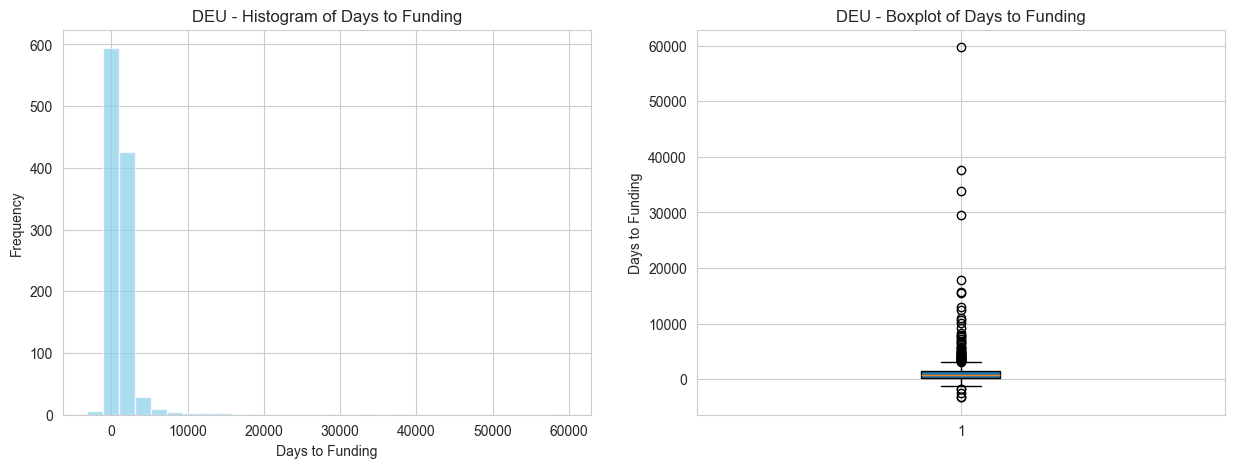

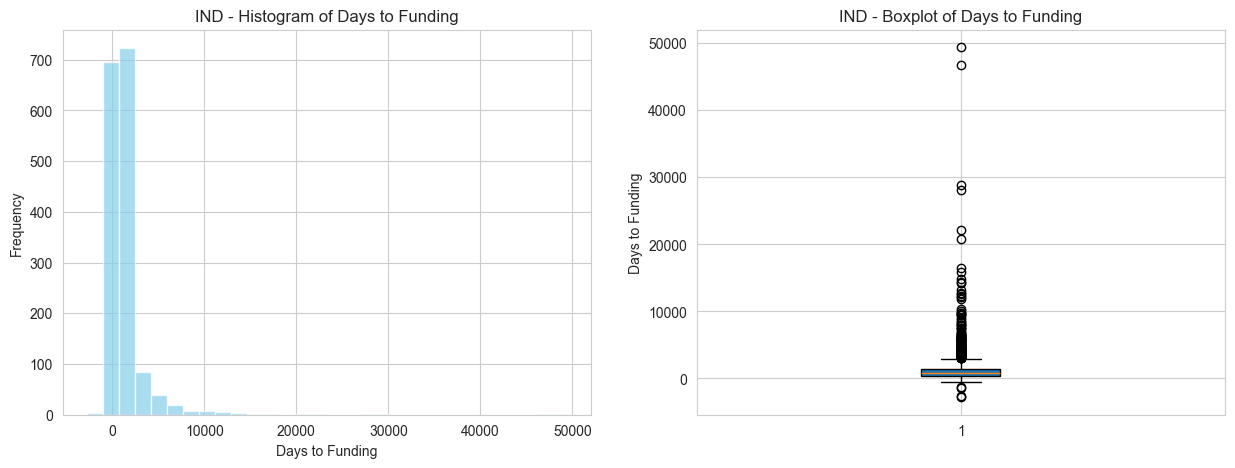

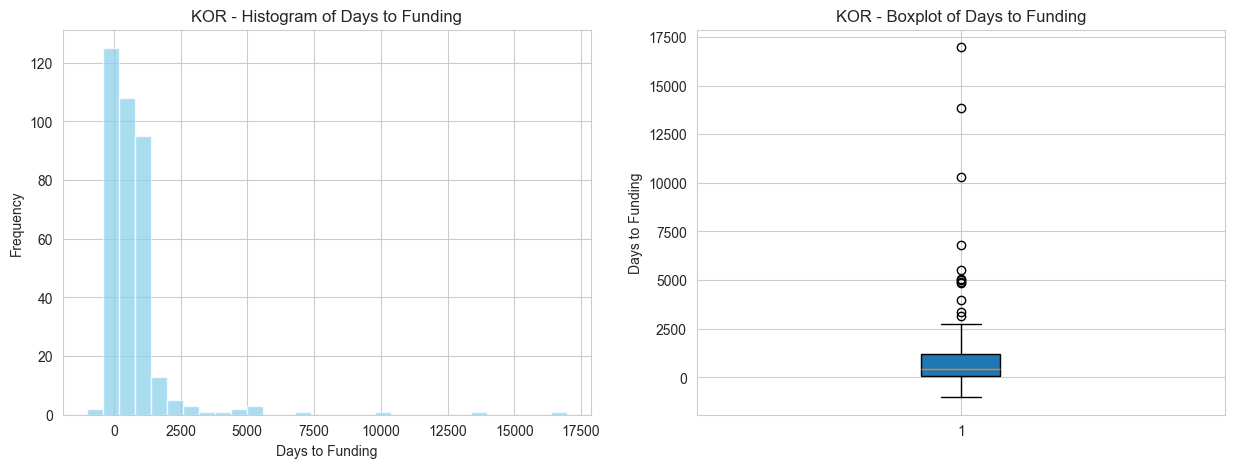

In [200]:
# Set up the matplotlib figure for USA
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
country_data = funding_dates[funding_dates['country_code'] == 'USA'].copy()
country_data['days_to_fund'] = (country_data['first_funding_at'] - country_data['founded_at']).dt.days
# Plot histogram on the left for USA
axes[0].hist(country_data['days_to_fund'].dropna(), bins=30, alpha=0.7, color='skyblue')
axes[0].set_title('USA - Histogram of Days to Funding')
axes[0].set_xlabel('Days to Funding')
axes[0].set_ylabel('Frequency')
# Plot boxplot on the right for USA
axes[1].boxplot(country_data['days_to_fund'].dropna(), patch_artist=True)
axes[1].set_title('USA - Boxplot of Days to Funding')
axes[1].set_ylabel('Days to Funding')
plt.show();

# Set up the matplotlib figure for CAN
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
country_data = funding_dates[funding_dates['country_code'] == 'CAN'].copy()
country_data['days_to_fund'] = (country_data['first_funding_at'] - country_data['founded_at']).dt.days
# Plot histogram on the left for CAN
axes[0].hist(country_data['days_to_fund'].dropna(), bins=30, alpha=0.7, color='skyblue')
axes[0].set_title('CAN - Histogram of Days to Funding')
axes[0].set_xlabel('Days to Funding')
axes[0].set_ylabel('Frequency')
# Plot boxplot on the right for CAN
axes[1].boxplot(country_data['days_to_fund'].dropna(), patch_artist=True)
axes[1].set_title('CAN - Boxplot of Days to Funding')
axes[1].set_ylabel('Days to Funding')
plt.show();

# Filter the funding_dates DataFrame for France
fra_data = funding_dates[funding_dates['country_code'] == 'FRA'].copy()
# Calculate the days to funding
fra_data['days_to_fund'] = (fra_data['first_funding_at'] - fra_data['founded_at']).dt.days
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# Plot histogram on the left for France
axes[0].hist(fra_data['days_to_fund'].dropna(), bins=30, alpha=0.7, color='skyblue')
axes[0].set_title('FRA - Histogram of Days to Funding')
axes[0].set_xlabel('Days to Funding')
axes[0].set_ylabel('Frequency')

# Plot boxplot on the right for France
axes[1].boxplot(fra_data['days_to_fund'].dropna(), patch_artist=True)
axes[1].set_title('FRA - Boxplot of Days to Funding')
axes[1].set_ylabel('Days to Funding')

# Show the plots
plt.show();



# Filter the funding_dates DataFrame for Germany
deu_data = funding_dates[funding_dates['country_code'] == 'DEU'].copy()

# Calculate the days to funding
deu_data['days_to_fund'] = (deu_data['first_funding_at'] - deu_data['founded_at']).dt.days

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot histogram on the left for Germany
axes[0].hist(deu_data['days_to_fund'].dropna(), bins=30, alpha=0.7, color='skyblue')
axes[0].set_title('DEU - Histogram of Days to Funding')
axes[0].set_xlabel('Days to Funding')
axes[0].set_ylabel('Frequency')

# Plot boxplot on the right for Germany
axes[1].boxplot(deu_data['days_to_fund'].dropna(), patch_artist=True)
axes[1].set_title('DEU - Boxplot of Days to Funding')
axes[1].set_ylabel('Days to Funding')

# Show the plots
plt.show();



# Filter the funding_dates DataFrame for India
ind_data = funding_dates[funding_dates['country_code'] == 'IND'].copy()

# Calculate the days to funding
ind_data['days_to_fund'] = (ind_data['first_funding_at'] - ind_data['founded_at']).dt.days

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot histogram on the left for India
axes[0].hist(ind_data['days_to_fund'].dropna(), bins=30, alpha=0.7, color='skyblue')
axes[0].set_title('IND - Histogram of Days to Funding')
axes[0].set_xlabel('Days to Funding')
axes[0].set_ylabel('Frequency')

# Plot boxplot on the right for India
axes[1].boxplot(ind_data['days_to_fund'].dropna(), patch_artist=True)
axes[1].set_title('IND - Boxplot of Days to Funding')
axes[1].set_ylabel('Days to Funding')

# Show the plots
plt.show();



# Filter the funding_dates DataFrame for South Korea
kor_data = funding_dates[funding_dates['country_code'] == 'KOR'].copy()

# Calculate the days to funding
kor_data['days_to_fund'] = (kor_data['first_funding_at'] - kor_data['founded_at']).dt.days

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot histogram on the left for South Korea
axes[0].hist(kor_data['days_to_fund'].dropna(), bins=30, alpha=0.7, color='skyblue')
axes[0].set_title('KOR - Histogram of Days to Funding')
axes[0].set_xlabel('Days to Funding')
axes[0].set_ylabel('Frequency')

# Plot boxplot on the right for South Korea
axes[1].boxplot(kor_data['days_to_fund'].dropna(), patch_artist=True)
axes[1].set_title('KOR - Boxplot of Days to Funding')
axes[1].set_ylabel('Days to Funding')

# Show the plots
plt.show();




Histograms and boxplots for each country have been generated separately. These visualizations show the distribution of the number of days startups in each country take to receive their first round of funding, with imputations for missing 'founded_at' dates based on the calculated average across the dataset.

From the histograms and boxplots:

Variability and Range: The spread of days to funding varies by country, with some countries showing a wide range of days, indicating variability in how quickly startups receive funding.

Central Tendency: The boxplots show the median and interquartile range which provides an idea of the central tendency and spread of the data. The median gives a better sense of the 'typical' time to funding, as it is less affected by extreme values compared to the mean.

Outliers: The boxplots can also reveal outliers, which are startups that took an exceptionally short or long time to receive funding compared to others.

Comparison Between Countries: By comparing the histograms and boxplots, we can observe differences between the countries in terms of how long startups typically wait for funding. For instance, South Korea shows a relatively shorter time to funding, while Canada has a wider spread and longer time to funding.

These visualizations and the calculated averages provide a comparative perspective on the startup funding timelines across the selected countries.

## 7. Probability Theory: 

- Find the probability for startups of being funded within the first 6 months since their creation for the overall dataset and then repeat the same sequence of procedures for the countries United States, Canada, France, Germany, China, and India (While making necessary computations, assume that there are 30 days in each month at an average). 
- Report your results in writing and compare them varying across various geographies. Create appropriate plots (if necessary) to draw conclusions if necessary.

In [213]:
funding_dates['founded_at'] = pd.to_datetime(funding_dates['founded_at'], errors='coerce')
funding_dates['first_funding_at'] = pd.to_datetime(funding_dates['first_funding_at'], errors='coerce')
funding_dates['last_funding_at'] = pd.to_datetime(funding_dates['last_funding_at'], errors='coerce')


# Calculate the days to funding
funding_dates['days_to_fund'] = (funding_dates['first_funding_at'] - funding_dates['founded_at']).dt.days

# Calculate the probability for the overall dataset
total_startups = len(funding_dates)
startups_funded_within_6_months = len(funding_dates[funding_dates['days_to_fund'] <= 180])  # 6 months * 30 days
probability_overall = startups_funded_within_6_months / total_startups

# Calculate the probability for each specified country
countries_extended = ['USA', 'CAN', 'FRA', 'DEU', 'CHN', 'IND']
probability_by_country = {}
for country in countries_extended:
    country_data = funding_dates[funding_dates['country_code'] == country]
    total_startups_country = len(country_data)
    startups_funded_within_6_months_country = len(country_data[country_data['days_to_fund'] <= 180])
    
    probability_by_country[country] = startups_funded_within_6_months_country / total_startups_country if total_startups_country > 0 else 0

# Combine overall and per-country probabilities into a single dictionary
probability_results = {'Overall': probability_overall}
probability_results.update(probability_by_country)

probability_results



funding_dates.info()

{'Overall': 0.21407907425265188,
 'USA': 0.20294673014015585,
 'CAN': 0.19428571428571428,
 'FRA': 0.17444933920704847,
 'DEU': 0.2365988909426987,
 'CHN': 0.10103626943005181,
 'IND': 0.17543859649122806}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         66368 non-null  int64         
 1   name               66368 non-null  object        
 2   category_list      63220 non-null  object        
 3   funding_total_usd  66368 non-null  float64       
 4   status             66368 non-null  object        
 5   country_code       59410 non-null  object        
 6   state_code         57821 non-null  object        
 7   region             58338 non-null  object        
 8   city               58340 non-null  object        
 9   funding_rounds     66368 non-null  int64         
 10  founded_at         66368 non-null  datetime64[ns]
 11  first_funding_at   66368 non-null  datetime64[ns]
 12  last_funding_at    66368 non-null  datetime64[ns]
 13  days_to_fund       66368 non-null  int64         
dtypes: dat

The results you've obtained show the probabilities of startups being funded within the first 6 months since their creation for both the overall dataset and specific countries. Here's a brief analysis:

Overall Probability: Approximately 21.41% of startups in the overall dataset received funding within the first 6 months.

By Country:

USA: Approximately 20.29% of startups received funding within the first 6 months.
Canada (CAN): Approximately 19.43%.
France (FRA): Approximately 17.44%.
Germany (DEU): Approximately 23.66%, which is notably higher than other countries.
China (CHN): Approximately 10.10%, the lowest among the listed countries.
India (IND): Approximately 17.54%.
Interpreting the Results:

The probabilities suggest that the likelihood of early-stage funding varies across different geographies.
Startups in Germany appear to have a higher chance of receiving funding within 6 months compared to those in other countries.
Conversely, startups in China seem to face the most significant challenges in securing early funding.
To visually represent these probabilities, a bar chart would be effective. It would allow for an easy comparison of the likelihood of early funding across these different countries. The differences in probabilities can be influenced by various factors, including the maturity of the startup ecosystem in each country, the availability of venture capital, the nature of industries predominant in each region, and the overall economic environment.

If you're interested in creating a bar chart for these probabilities, you can use a plotting library like Matplotlib or Seaborn in Python. This visual representation would provide a clearer and more immediate understanding of how the probability of early funding varies from one country to another.

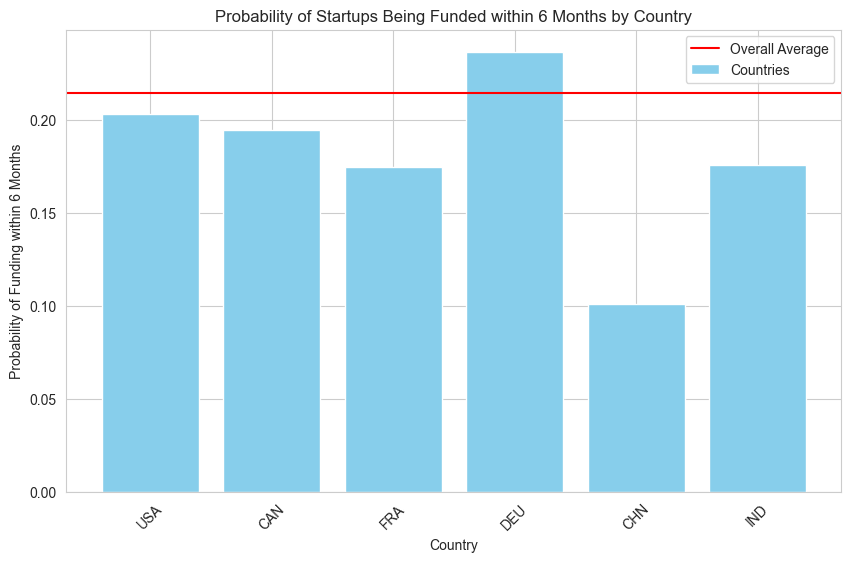

In [216]:
import matplotlib.pyplot as plt

# Extracting probabilities for plotting
countries_for_plot = list(probability_by_country.keys())
probabilities_for_plot = list(probability_by_country.values())

# Creating the bar plot for countries
plt.figure(figsize=(10, 6))
plt.bar(countries_for_plot, probabilities_for_plot, color='skyblue', label='Countries')

# Adding a horizontal line for the overall probability
plt.axhline(y=probability_overall, color='r', linestyle='-', label='Overall Average')

plt.xlabel('Country')
plt.ylabel('Probability of Funding within 6 Months')
plt.title('Probability of Startups Being Funded within 6 Months by Country')
plt.xticks(rotation=45)
plt.legend()
plt.show();


In [214]:
# Revised approach to calculate the probability for each country and the overall dataset

# Define a function to calculate the probability
def calculate_probability(df, days_threshold):
    total_startups = len(df)
    funded_within_threshold = len(df[df['days_to_fund'] <= days_threshold])
    return funded_within_threshold / total_startups if total_startups > 0 else 0

# Days threshold for 6 months (assuming 30 days per month)
days_6_months = 6 * 30

# Calculate the probability for the overall dataset
probability_overall = calculate_probability(funding_dates, days_6_months)

# Calculate the probability for each specified country
probability_by_country = {country: calculate_probability(funding_dates[funding_dates['country_code'] == country], days_6_months) for country in countries_extended}

# Combine overall and per-country probabilities into a single dictionary
probability_results = {'Overall': probability_overall}
probability_results.update(probability_by_country)

probability_results


{'Overall': 0.21407907425265188,
 'USA': 0.20294673014015585,
 'CAN': 0.19428571428571428,
 'FRA': 0.17444933920704847,
 'DEU': 0.2365988909426987,
 'CHN': 0.10103626943005181,
 'IND': 0.17543859649122806}

## 8. Advanced Probability Theory: 

- Find the probability for startups of being funded within the first 6 months given the fact that they are based on software domain and then repeat the same sequence of procedures for the countries United States, Canada, France, Germany, China, and India(Use the value ‘Software’ in the appropriate variable of your choice).

To find the probability of startups in the software domain being funded within the first 6 months since their creation, both for the overall dataset and for specific countries, you can follow these steps:

Filter for Software Domain: Identify the startups that are in the software domain. This typically involves filtering the dataset based on a category or sector column that contains the value 'Software'.

Calculate Probabilities:

Determine the number of these software startups that were funded within the first 6 months.
Calculate the probability by dividing this number by the total number of software startups.
Repeat for Each Country: Perform the same calculations for the software startups in each specified country.

In [220]:
# Filter the dataset for software startups
#The method .str.contains('Software', na=False)
#is used to filter for entries where the category list contains 'Software'. 
#The na=False parameter treats NaNs as False during the filtering.
software_startups = funding_dates[funding_dates['category_list'].str.contains('Software', na=False)]

# Calculate the probability for software startups in the overall dataset
total_software_startups = len(software_startups)
software_startups_funded_within_6_months = len(software_startups[software_startups['days_to_fund'] <= 180])
probability_software_overall = software_startups_funded_within_6_months / total_software_startups

# Calculate the probability for each specified country
probability_software_by_country = {}
for country in ['USA', 'CAN', 'FRA', 'DEU', 'CHN', 'IND']:
    country_software_startups = software_startups[software_startups['country_code'] == country]
    total_country_software_startups = len(country_software_startups)
    country_software_startups_funded_within_6_months = len(country_software_startups[country_software_startups['days_to_fund'] <= 180])
    
    probability_software_by_country[country] = (country_software_startups_funded_within_6_months / total_country_software_startups 
                                                if total_country_software_startups > 0 else 0)

# Combine overall and per-country probabilities into a single dictionary
probability_software_results = {'Overall': probability_software_overall}
probability_software_results.update(probability_software_by_country)

probability_software_results


{'Overall': 0.19981296758104738,
 'USA': 0.1830041453304072,
 'CAN': 0.18888888888888888,
 'FRA': 0.1423611111111111,
 'DEU': 0.2028985507246377,
 'CHN': 0.06629834254143646,
 'IND': 0.19696969696969696}

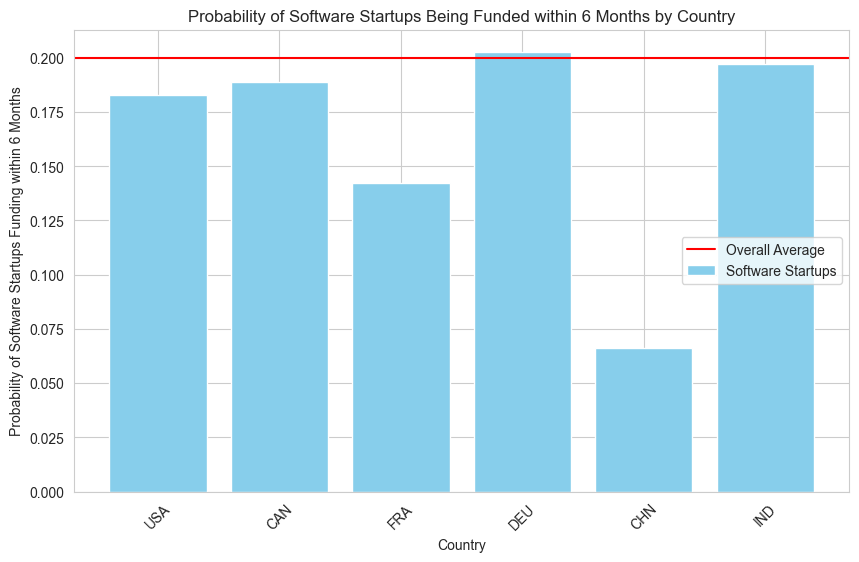

In [222]:
# Assuming 'probability_software_by_country' is the dictionary with the calculated probabilities
# and 'probability_software_overall' is the overall probability for software startups

# Prepare data for plotting
countries = list(probability_software_by_country.keys())
probabilities = list(probability_software_by_country.values())

# Create the bar plot for software startups in countries
plt.figure(figsize=(10, 6))
plt.bar(countries, probabilities, color='skyblue', label='Software Startups')

# Adding a horizontal line for the overall probability of software startups
plt.axhline(y=probability_software_overall, color='r', linestyle='-', label='Overall Average')

plt.xlabel('Country')
plt.ylabel('Probability of Software Startups Funding within 6 Months')
plt.title('Probability of Software Startups Being Funded within 6 Months by Country')
plt.xticks(rotation=45)
plt.legend()
plt.show();


## 9. Advanced Probability Theory: 

- Find the probability that a startup belongs to health care domain given the fact that it was funded within the first 6 months and then repeat the same sequence of procedures for the countries United States, Canada, France, Germany, China, and India (Use the value ‘Health Care’ in the appropriate variable of your choice). 

- Report your results based on probability found as a whole and then comparison across various countries.

To find the probability that a startup belongs to the health care domain given that it was funded within the first 6 months, both for the overall dataset and for specific countries, you can use conditional probability. The steps are as follows:

Filter Startups Funded Within 6 Months: Identify the startups that received funding within the first 6 months.

Calculate Probabilities:

From this subset, determine the number of startups that belong to the health care domain.
Calculate the probability by dividing this number by the total number of startups funded within 6 months.
Repeat for Each Country: Perform the same calculations for the subset of data pertaining to each specified country.

Visualization and Comparison: Present the results in a bar plot with a horizontal line indicating the overall average for comparison.

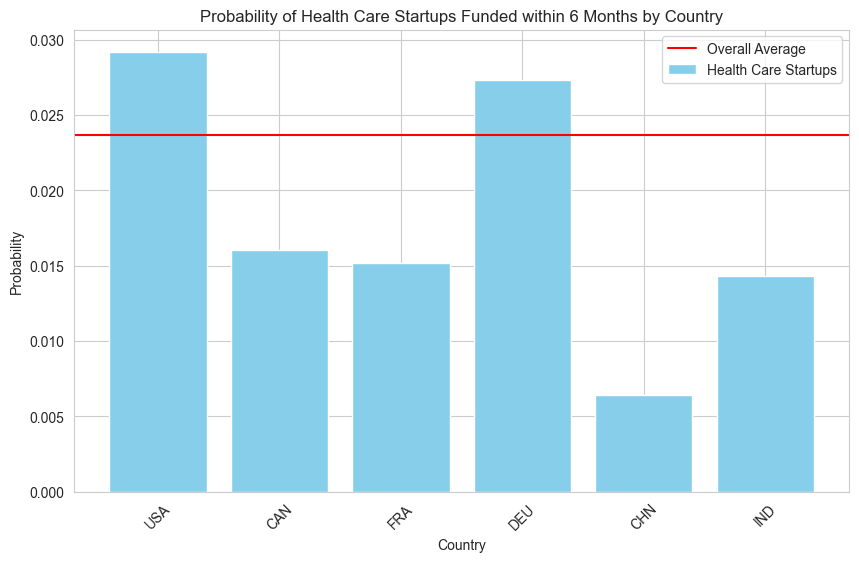

In [226]:
# Filter the dataset for startups funded within 6 months
funded_within_6_months = funding_dates[funding_dates['days_to_fund'] <= 180]

# Calculate the probability for health care startups in the overall dataset
total_funded_within_6_months = len(funded_within_6_months)
healthcare_startups_funded_within_6_months = len(funded_within_6_months[funded_within_6_months['category_list'].str.contains('Health Care', na=False)])
probability_healthcare_overall = healthcare_startups_funded_within_6_months / total_funded_within_6_months

# Calculate the probability for each specified country
probability_healthcare_by_country = {}
for country in ['USA', 'CAN', 'FRA', 'DEU', 'CHN', 'IND']:
    country_data = funded_within_6_months[funded_within_6_months['country_code'] == country]
    total_country_funded_within_6_months = len(country_data)
    country_healthcare_startups = len(country_data[country_data['category_list'].str.contains('Health Care', na=False)])
    
    probability_healthcare_by_country[country] = (country_healthcare_startups / total_country_funded_within_6_months 
                                                if total_country_funded_within_6_months > 0 else 0)

# Combine overall and per-country probabilities into a single dictionary
probability_healthcare_results = {'Overall': probability_healthcare_overall}
probability_healthcare_results.update(probability_healthcare_by_country)

probability_healthcare_results
# Bar plot code (to be executed in your Python environment)
import matplotlib.pyplot as plt

countries = list(probability_healthcare_by_country.keys())
probabilities = list(probability_healthcare_by_country.values())

plt.figure(figsize=(10, 6))
plt.bar(countries, probabilities, color='skyblue', label='Health Care Startups')
plt.axhline(y=probability_healthcare_overall, color='r', linestyle='-', label='Overall Average')

plt.xlabel('Country')
plt.ylabel('Probability')
plt.title('Probability of Health Care Startups Funded within 6 Months by Country')
plt.xticks(rotation=45)
plt.legend()
plt.show();


## 10. Advanced Probability Theory: 

- Repeat the analysis in Question 8 but this time perform the operation by first sampling your dataset randomly by getting only 10 data points in the beginning and report your observations as that in Question 8. 

- Next, attempt to repeat the aforesaid procedure for dataset of increasing sample size of 50, 100, 200, 300, 400, 500, 600, and 800. 

- Plot the various probabilities observed against the number of data points you have obtained and write in your own words the observations. 